In [39]:
#all imports

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import collections

# Part - (1) : Understanding the error surface

In [40]:
########################################
#Generate meaningfull data
########################################
np.random.seed(0)

true_w1 = 3.86
true_w0 = -100.42


x = np.random.uniform(55, 75, 25)

# Generate true weights
true_y = true_w1 * x + true_w0

# Add Gaussian noise (mean=0, std=sqrt(20))
noise = np.random.normal(0, np.sqrt(20), x.shape)
t = true_y + noise


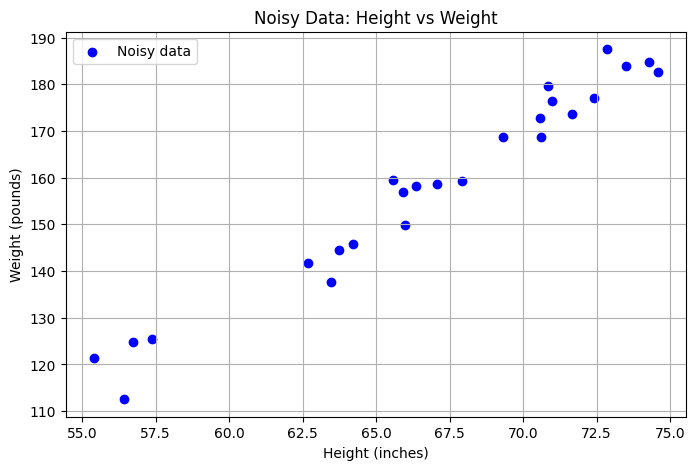

In [41]:
 ########################################
 #Plot scatter plot of data
 ########################################
plt.figure(figsize=(8, 5))
plt.scatter(x, t, label='Noisy data', color='blue')
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.title("Noisy Data: Height vs Weight")
plt.legend()
plt.grid(True)
plt.show()


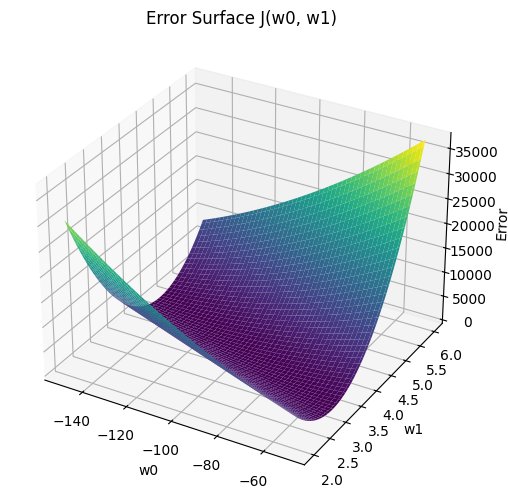

Minimum error: 16.41
Empirically estimated weights: w0 = -91.41, w1 = 3.74


In [42]:
 ##############################################################################################
 #Weight estimation through error surface, i.e., empirically locate the minima of error surface
 ##############################################################################################

def compute_error(w0, w1, x, t):
    y_pred = w0 + w1 * x
    error = np.mean((y_pred - t) ** 2)
    return error

# Grid of w0 and w1 values
w0_vals = np.linspace(-150, -50, 100)
w1_vals = np.linspace(2, 6, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
Error = np.zeros_like(W0)

# Compute error surface
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        Error[i, j] = compute_error(W0[i, j], W1[i, j], x, t)

# Plot 3D error surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, Error, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Error')
ax.set_title('Error Surface J(w0, w1)')
plt.show()

#Finding the indices where the error is minimum
min_index = np.unravel_index(np.argmin(Error), Error.shape)
w0_min = W0[min_index]
w1_min = W1[min_index]
min_error = Error[min_index]

print(f"Minimum error: {min_error:.2f}")
print(f"Empirically estimated weights: w0 = {w0_min:.2f}, w1 = {w1_min:.2f}")


In [43]:
 ########################################
 #Least squares approach to estimate the weights
 ########################################

def LinearRegression(x, t):
    X = np.vstack((np.ones_like(x), x)).T
    w_opt = np.linalg.inv(X.T @ X) @ (X.T @ t)
    return w_opt

# Estimate optimal weights using the LinearRegression function
w_opt = LinearRegression(x, t)
w0_opt, w1_opt = w_opt
print(f"Estimated weights: w0 = {w0_opt:.2f}, w1 = {w1_opt:.2f}")


Estimated weights: w0 = -89.56, w1 = 3.71


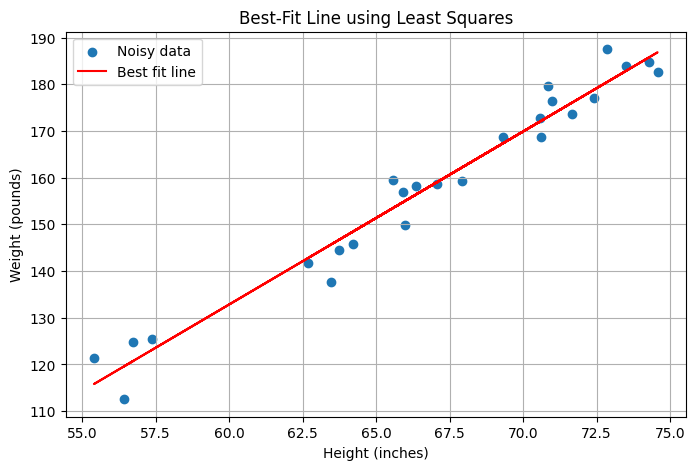

In [44]:
#Plot the estimated line on top of the above scatter plot
x_line = x
y_line = w0_opt + w1_opt * x_line

plt.figure(figsize=(8, 5))
plt.scatter(x, t, label='Noisy data')
plt.plot(x_line, y_line, color='red', label='Best fit line')
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.title("Best-Fit Line using Least Squares")
plt.legend()
plt.grid(True)
plt.show()


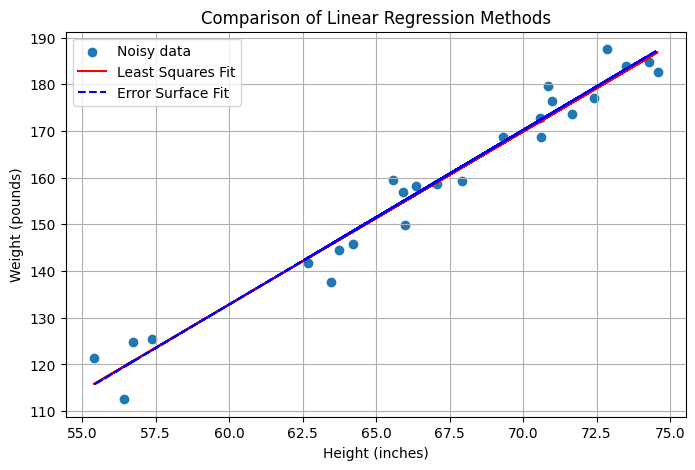

Comparison of estimated weights:
Least Squares (Closed-form) solution: w0 = -89.56, w1 = 3.71
Error Surface (Grid Search) solution: w0 = -91.41, w1 = 3.74
Difference in w0: 1.8587
Difference in w1: 0.0310


In [45]:
############################################################################################
#Compare the estimated weight's using least squares approach with the error surface approach
############################################################################################
plt.figure(figsize=(8, 5))
plt.scatter(x, t, label='Noisy data')

# Least squares line
plt.plot(x_line, w0_opt + w1_opt * x_line, color='red', label='Least Squares Fit')

# Error surface line
plt.plot(x_line, w0_min + w1_min * x_line, color='blue', linestyle='--', label='Error Surface Fit')

plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.title("Comparison of Linear Regression Methods")
plt.legend()
plt.grid(True)
plt.show()

print("Comparison of estimated weights:")
print(f"Least Squares (Closed-form) solution: w0 = {w0_opt:.2f}, w1 = {w1_opt:.2f}")
print(f"Error Surface (Grid Search) solution: w0 = {w0_min:.2f}, w1 = {w1_min:.2f}")
print(f"Difference in w0: {abs(w0_opt - w0_min):.4f}")
print(f"Difference in w1: {abs(w1_opt - w1_min):.4f}")



#OBSERVATIONS-

1.The least squares method actually estimated the model parameters (w0,w1) very close to the actual values given to us.
This suggests that the least squares approach is effective at capturing the underlying linear relationship even in the presence of noise.

2.The error surface J(w0,w1) is a convex paraboloid, which means it has a single global minimum.
This confirms that linear regression with mean squared error has a unique solution (no local minima)

3.Even though the data had noise added (Gaussian noise with variance 20), the model still recovered weights close to the ground truth.
This shows that the least squares method is robust to some amount of noise.

4.When plotting the best-fit line over the noisy scatter plot, the line passes through the general trend of the data.
This shows the model has generalized well to the data and is not overfitting the noise.

#Part - (2) : Understanding model order and overfitting

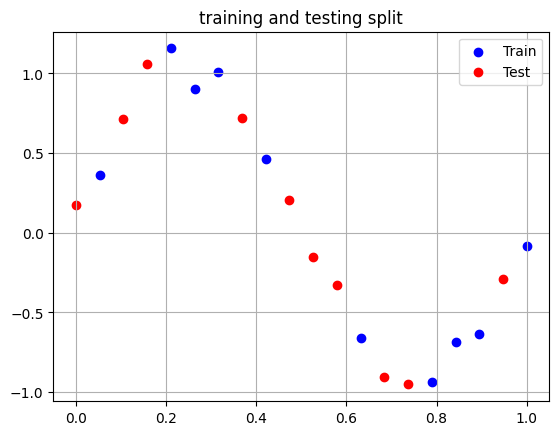

In [46]:
 ########################################
 #Generate 20 data points
 ########################################

np.random.seed(0)
N = 20

# Generate data
X = np.linspace(0, 1, N)
noise = np.random.normal(0, 0.1, N)
T = np.sin(2 * np.pi * X) + noise

##Obtain train and test splits

# Random permutation of indices
indices = np.random.permutation(N)

train_idx = indices[:10]
test_idx = indices[10:]

# Get training and testing sets
X_train, T_train = X[train_idx], T[train_idx]
X_test, T_test = X[test_idx], T[test_idx]

# Plot
plt.scatter(X_train, T_train, color='blue', label='Train')
plt.scatter(X_test, T_test, color='red', label='Test')
plt.title("training and testing split")
plt.legend()
plt.grid(True)
plt.show()


In [47]:
 ###########################################################
 #Fitting Mth degree polynomial using least squares approach
 ###########################################################

# ---------- Polynomial Feature Transformation ----------
def polynomial_features(X, M):
    return np.vstack([X**i for i in range(M + 1)]).T

# ---------- Fit Polynomial using Least Squares ----------
def PolynomialFit(X_train, Y_train, M, lamda):
    Phi = polynomial_features(X_train, M)
    I = np.eye(Phi.shape[1])
    w_opt = np.linalg.inv(Phi.T @ Phi + lamda * I) @ Phi.T @ Y_train
    return w_opt

# ---------- Predict Values for Train and Test ----------
def PolynomialPred(w_est, X_train, X_test):
    M = len(w_est) - 1
    Phi_train = polynomial_features(X_train, M)
    Phi_test = polynomial_features(X_test, M)
    Y_train_pred = Phi_train @ w_est
    Y_test_pred = Phi_test @ w_est
    return Y_train_pred, Y_test_pred

# ---------- Compute RMSE for Predictions ----------
def PolynomialPred_Error(w_est, X_train, X_test, Y_train, Y_test):
    Y_train_pred, Y_test_pred = PolynomialPred(w_est, X_train, X_test)
    TrainError = np.sqrt(np.mean((Y_train_pred - Y_train) ** 2))
    TestError = np.sqrt(np.mean((Y_test_pred - Y_test) ** 2))
    return TrainError, TestError


M_range = list(range(10))
TrError = []
TeError = []

weights = []

for M in M_range:
    w = PolynomialFit(X_train, T_train, M, 0)
    train_rmse, test_rmse = PolynomialPred_Error(w, X_train, X_test, T_train, T_test)
    TrError.append(train_rmse)
    TeError.append(test_rmse)
    weights.append(w)


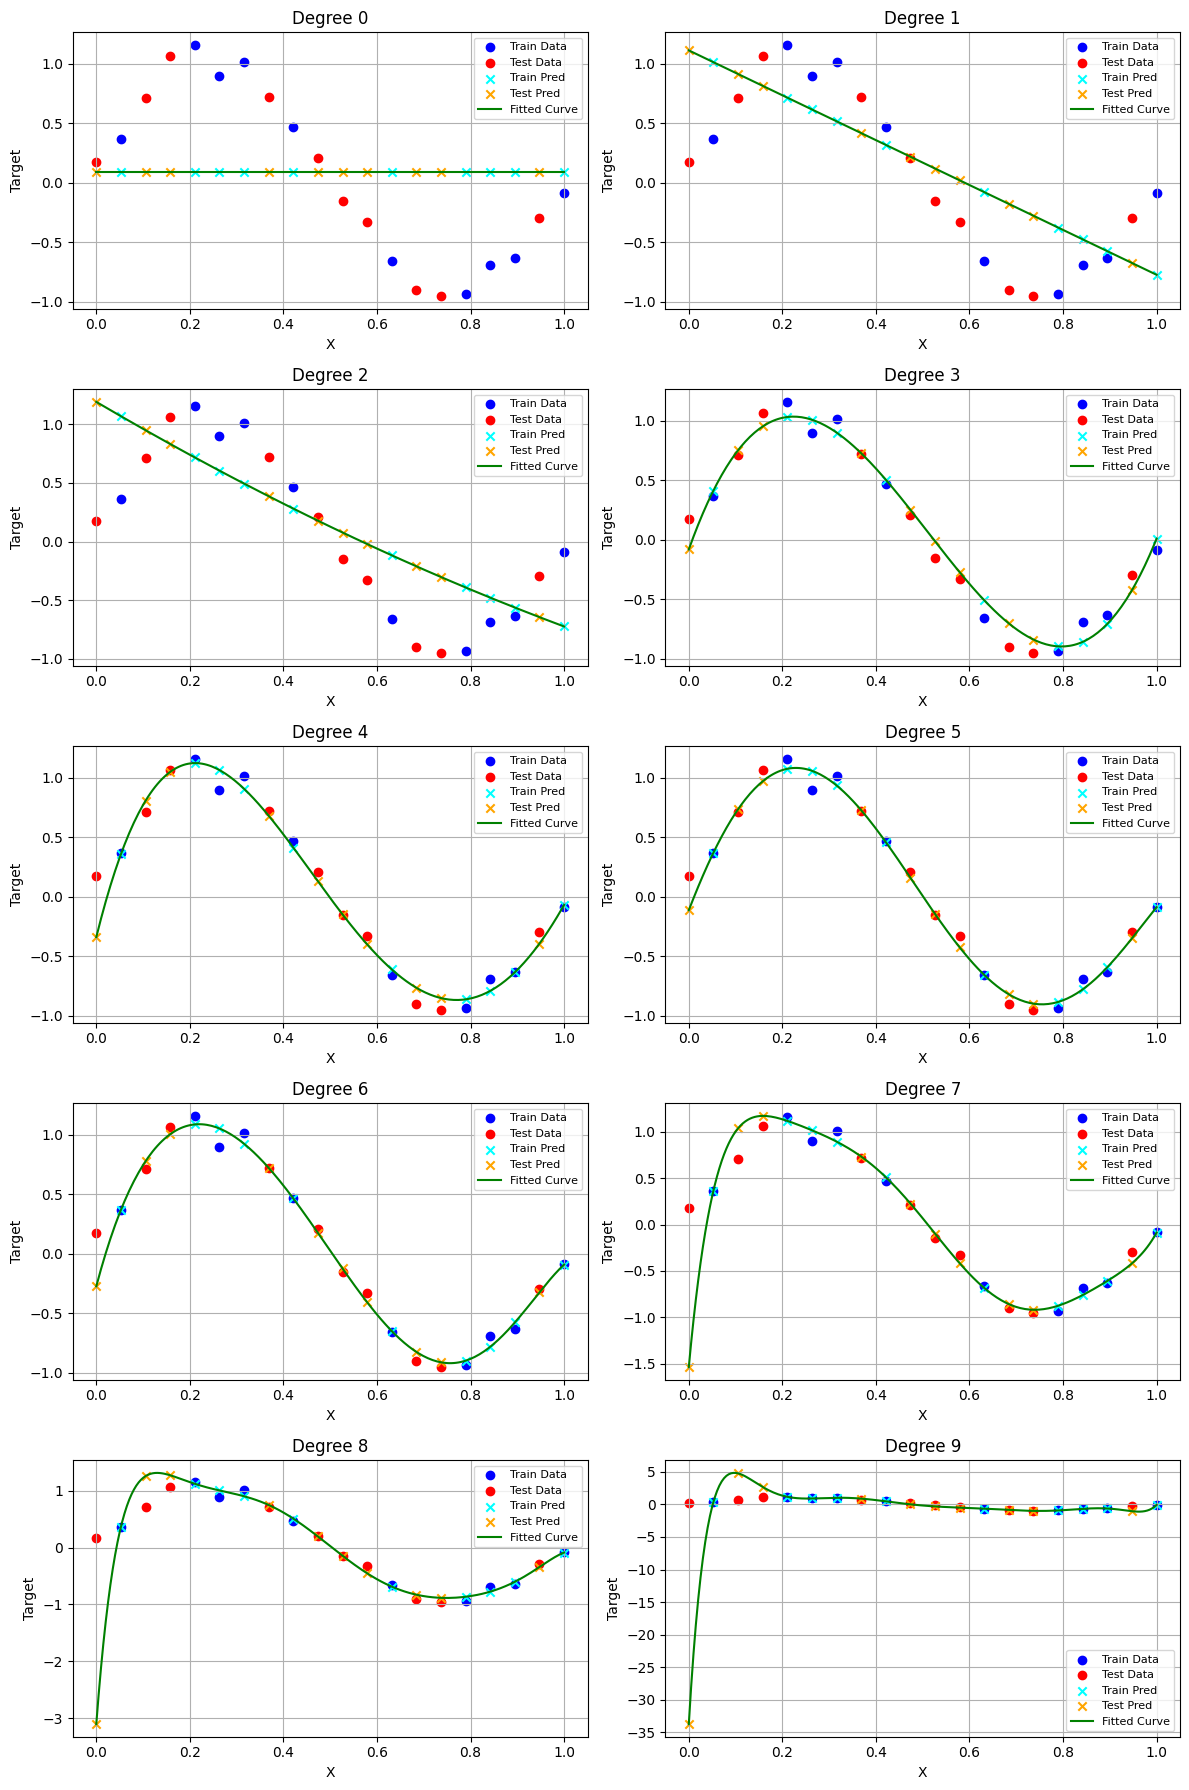

In [48]:
def plot_all_poly_fits(X_train, T_train, X_test, T_test, weights, max_degree=9):
    plt.figure(figsize=(12, 18))
    x_plot = np.linspace(0, 1, 200)

    for M in range(max_degree + 1):
        w = weights[M]
        Phi_plot = polynomial_features(x_plot, M)
        y_plot = Phi_plot @ w

        y_train_pred = polynomial_features(X_train, M) @ w
        y_test_pred = polynomial_features(X_test, M) @ w

        plt.subplot(5, 2, M + 1)
        h1 = plt.scatter(X_train, T_train, color='blue', label='Train Data')
        h2 = plt.scatter(X_test, T_test, color='red', label='Test Data')
        h3 = plt.scatter(X_train, y_train_pred, color='cyan', marker='x', label='Train Pred')
        h4 = plt.scatter(X_test, y_test_pred, color='orange', marker='x', label='Test Pred')
        h5, = plt.plot(x_plot, y_plot, color='green', label='Fitted Curve')

        plt.title(f'Degree {M}')
        plt.xlabel('X')
        plt.ylabel('Target')
        plt.grid(True)
        plt.legend(fontsize=8)

    plt.tight_layout()
    plt.show()


# Usage example (after fitting models and saving weights)
plot_all_poly_fits(X_train, T_train, X_test, T_test, weights)

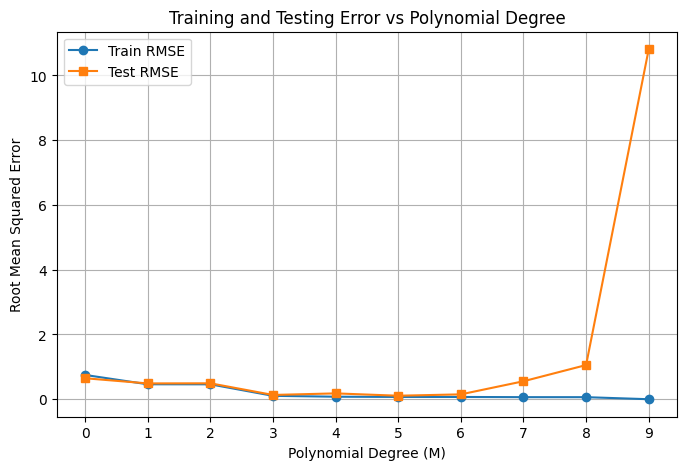

In [49]:
def plot_errors_vs_degree(TrError, TeError):
    degrees = list(range(len(TrError)))
    plt.figure(figsize=(8,5))
    plt.plot(degrees, TrError, marker='o', label='Train RMSE')
    plt.plot(degrees, TeError, marker='s', label='Test RMSE')
    plt.xlabel('Polynomial Degree (M)')
    plt.ylabel('Root Mean Squared Error')
    plt.title('Training and Testing Error vs Polynomial Degree')
    plt.xticks(degrees)
    plt.legend()
    plt.grid(True)
    plt.show()

# Usage example:
plot_errors_vs_degree(TrError, TeError)



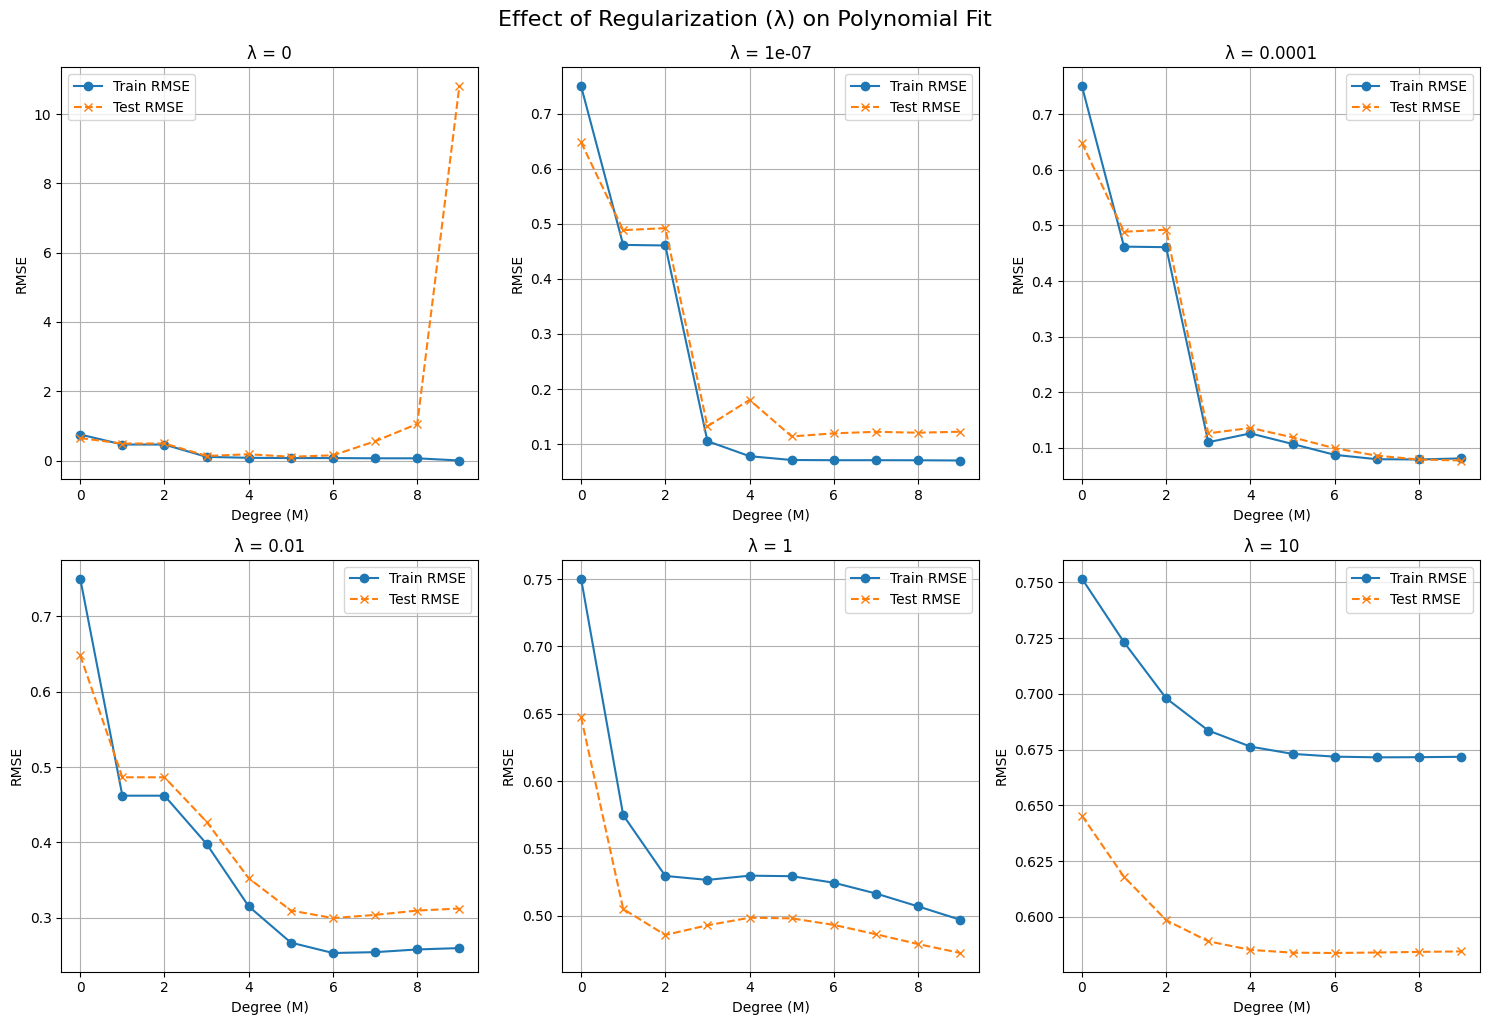

In [50]:
 ########################################
 #Effect of regularization
 ########################################
lambdas = [0, 1e-7, 1e-4, 1e-2, 1, 10]
M_range = range(10)
errors_train = {lam: [] for lam in lambdas}
errors_test = {lam: [] for lam in lambdas}

# Train and compute errors
for lam in lambdas:
    for M in M_range:
        w = PolynomialFit(X_train, T_train, M, lam)
        train_rmse, test_rmse = PolynomialPred_Error(w, X_train, X_test, T_train, T_test)
        errors_train[lam].append(train_rmse)
        errors_test[lam].append(test_rmse)

# Plotting RMSEs
plt.figure(figsize=(15, 10))
for i, lam in enumerate(lambdas):
    plt.subplot(2, 3, i+1)
    plt.plot(M_range, errors_train[lam], marker='o', label='Train RMSE')
    plt.plot(M_range, errors_test[lam], marker='x', linestyle='--', label='Test RMSE')
    plt.title(f'λ = {lam}')
    plt.xlabel('Degree (M)')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle('Effect of Regularization (λ) on Polynomial Fit', fontsize=16, y=1.02)
plt.show()

In [51]:
########################################
#Increase the size of training data set to 100 points and repeat the experiments
########################################
np.random.seed(0)

# Generate training data: 100 points evenly spaced in [0,1]
N_train = 100
X_train = np.linspace(0, 1, N_train)
noise_train = np.random.normal(0, 0.1, N_train)
T_train = np.sin(2 * np.pi * X_train) + noise_train

# Generate testing data: 10 points evenly spaced in [0,1]
N_test = 10
X_test = np.linspace(0, 1, N_test)
noise_test = np.random.normal(0, 0.1, N_test)
T_test = np.sin(2 * np.pi * X_test) + noise_test

In [52]:
M_range = list(range(10))
TrError = []
TeError = []
weights = []

for M in M_range:
    w = PolynomialFit(X_train, T_train, M, lamda=0)
    train_rmse, test_rmse = PolynomialPred_Error(w, X_train, X_test, T_train, T_test)
    TrError.append(train_rmse)
    TeError.append(test_rmse)
    weights.append(w)


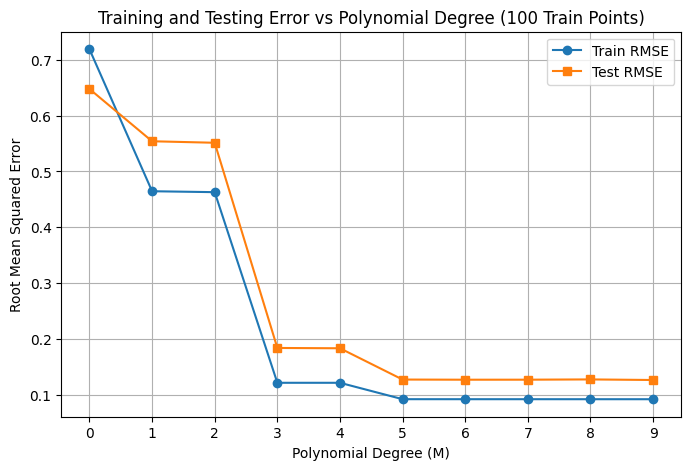

In [53]:
def plot_errors_vs_degree(TrError, TeError):
    degrees = list(range(len(TrError)))
    plt.figure(figsize=(8,5))
    plt.plot(degrees, TrError, marker='o', label='Train RMSE')
    plt.plot(degrees, TeError, marker='s', label='Test RMSE')
    plt.xlabel('Polynomial Degree (M)')
    plt.ylabel('Root Mean Squared Error')
    plt.title('Training and Testing Error vs Polynomial Degree (100 Train Points)')
    plt.xticks(degrees)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_errors_vs_degree(TrError, TeError)


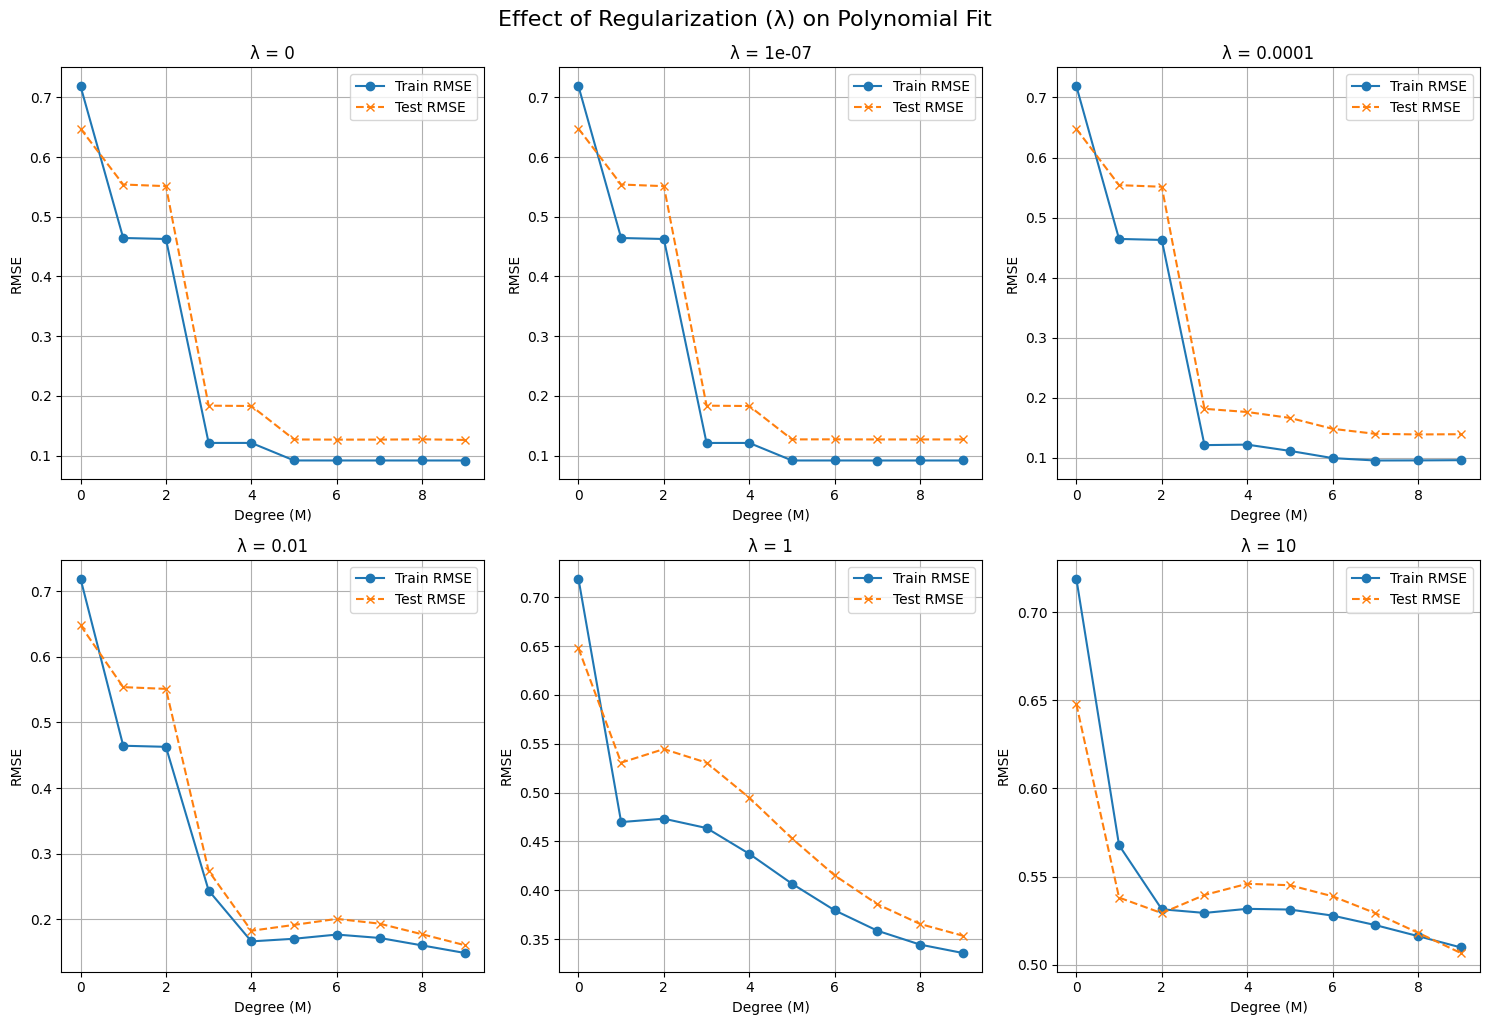

In [54]:
 ########################################
 #Effect of regularization
 ########################################
lambdas = [0, 1e-7, 1e-4, 1e-2, 1, 10]
M_range = range(10)
errors_train = {lam: [] for lam in lambdas}
errors_test = {lam: [] for lam in lambdas}

# Train and compute errors
for lam in lambdas:
    for M in M_range:
        w = PolynomialFit(X_train, T_train, M, lam)
        train_rmse, test_rmse = PolynomialPred_Error(w, X_train, X_test, T_train, T_test)
        errors_train[lam].append(train_rmse)
        errors_test[lam].append(test_rmse)

# Plotting RMSEs
plt.figure(figsize=(15, 10))
for i, lam in enumerate(lambdas):
    plt.subplot(2, 3, i+1)
    plt.plot(M_range, errors_train[lam], marker='o', label='Train RMSE')
    plt.plot(M_range, errors_test[lam], marker='x', linestyle='--', label='Test RMSE')
    plt.title(f'λ = {lam}')
    plt.xlabel('Degree (M)')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle('Effect of Regularization (λ) on Polynomial Fit', fontsize=16, y=1.02)
plt.show()

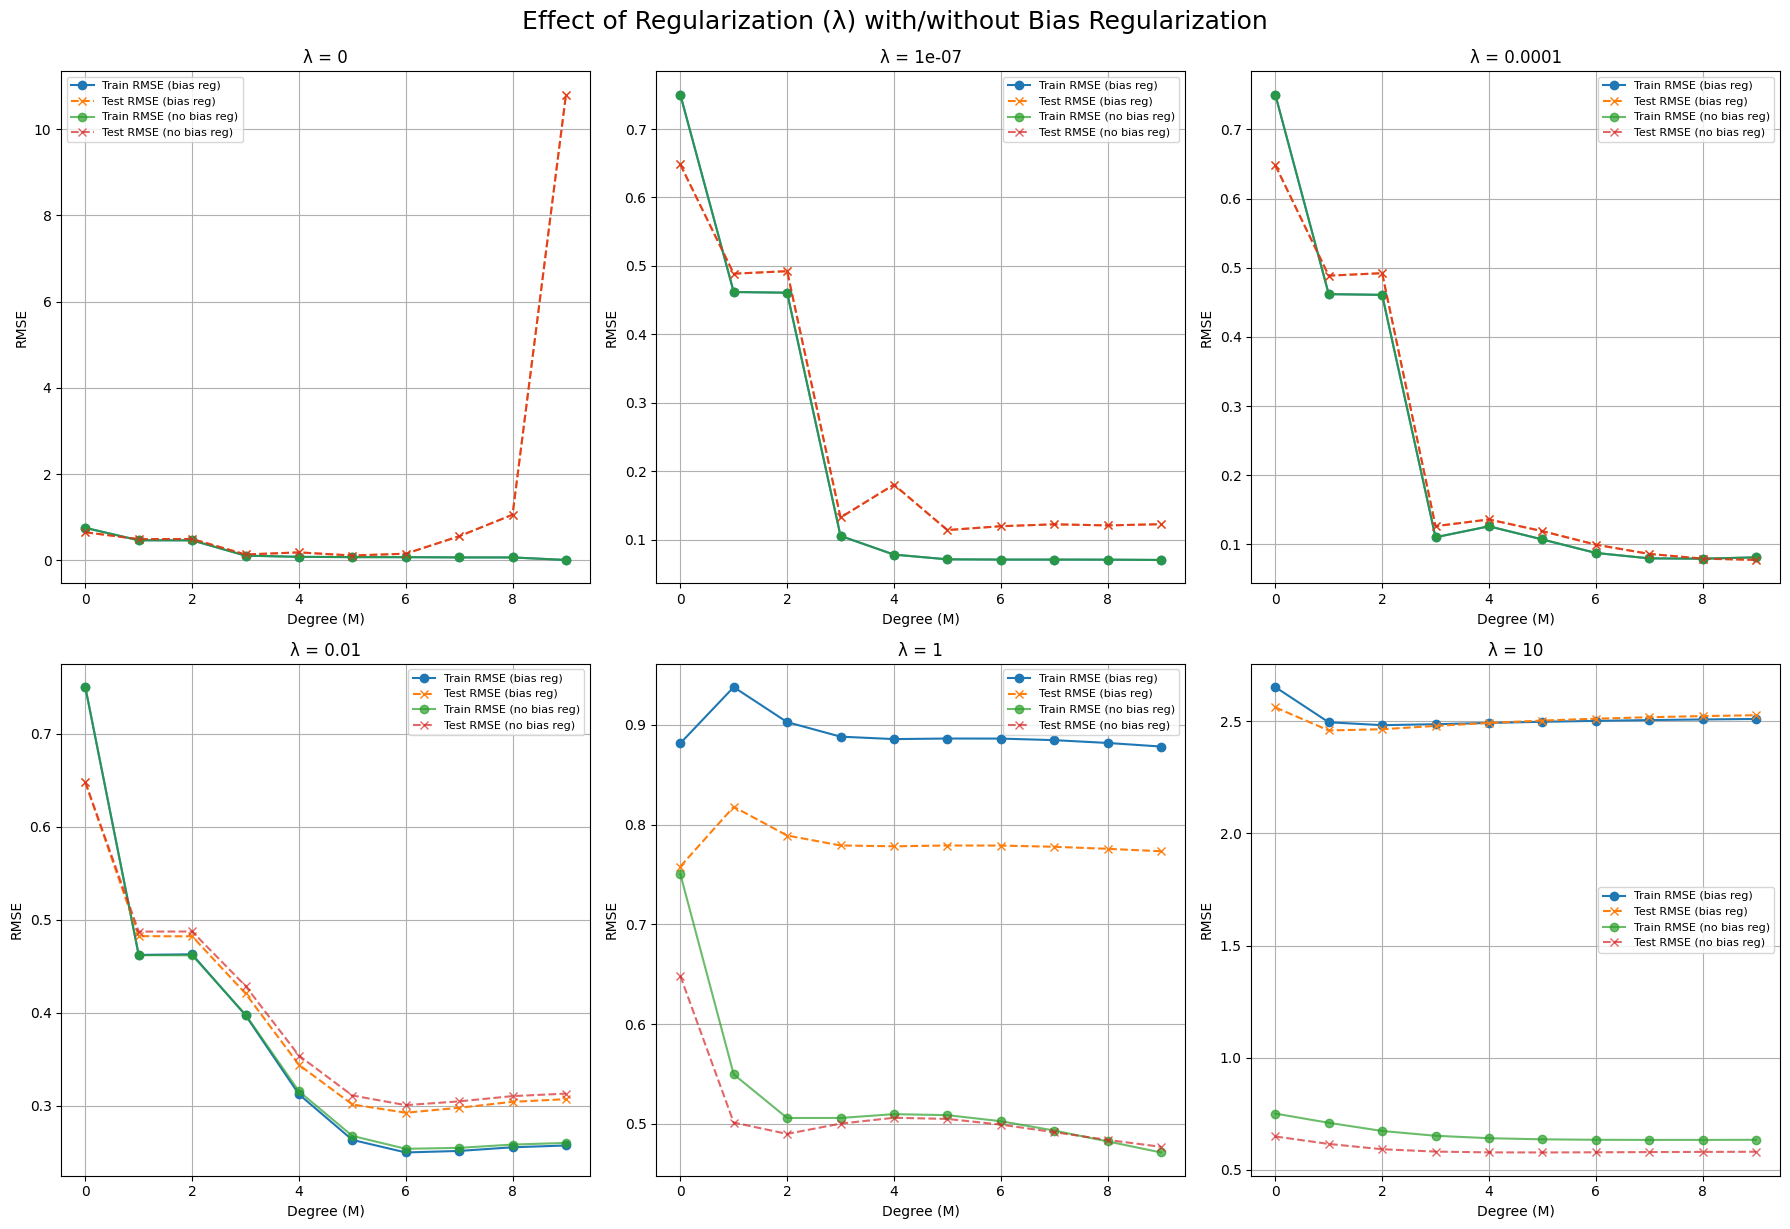

In [55]:
 ########################################
 #Effect of bias regularization
 ########################################

np.random.seed(0)
N = 20

# Generate data
X = np.linspace(0, 1, N)
noise = np.random.normal(0, 0.1, N)
T = 5 + np.sin(2 * np.pi * X) + noise

# Train-test split
indices = np.random.permutation(N)
train_idx = indices[:10]
test_idx = indices[10:]
X_train, T_train = X[train_idx], T[train_idx]
X_test, T_test = X[test_idx], T[test_idx]

# Polynomial features
def polynomial_features(X, M):
    return np.vstack([X**i for i in range(M + 1)]).T

# Fit polynomial with optional bias regularization
def PolynomialFit(X_train, Y_train, M, lamda=0, reg_bias=True):
    Phi = polynomial_features(X_train, M)
    I = np.eye(Phi.shape[1])
    if not reg_bias:
        I[0, 0] = 0  # Don't regularize bias term
    w_opt = np.linalg.inv(Phi.T @ Phi + lamda * I) @ Phi.T @ Y_train
    return w_opt

# Predict function
def PolynomialPred(w_est, X):
    M = len(w_est) - 1
    Phi = polynomial_features(X, M)
    return Phi @ w_est

# RMSE calculation
def PolynomialPred_Error(w_est, X_train, X_test, Y_train, Y_test):
    Y_train_pred = PolynomialPred(w_est, X_train)
    Y_test_pred = PolynomialPred(w_est, X_test)
    TrainError = np.sqrt(np.mean((Y_train_pred - Y_train) ** 2))
    TestError = np.sqrt(np.mean((Y_test_pred - Y_test) ** 2))
    return TrainError, TestError

# Lambdas and model orders
lambdas = [0, 1e-7, 1e-4, 1e-2, 1, 10]
M_range = range(10)

# Store RMSE errors
errors_train_regbias = {lam: [] for lam in lambdas}
errors_test_regbias = {lam: [] for lam in lambdas}
errors_train_nobias = {lam: [] for lam in lambdas}
errors_test_nobias = {lam: [] for lam in lambdas}

# Train and evaluate
for lam in lambdas:
    for M in M_range:
        # With bias regularization
        w_regbias = PolynomialFit(X_train, T_train, M, lamda=lam, reg_bias=True)
        train_rmse_rb, test_rmse_rb = PolynomialPred_Error(w_regbias, X_train, X_test, T_train, T_test)
        errors_train_regbias[lam].append(train_rmse_rb)
        errors_test_regbias[lam].append(test_rmse_rb)

        # Without bias regularization
        w_nobias = PolynomialFit(X_train, T_train, M, lamda=lam, reg_bias=False)
        train_rmse_nb, test_rmse_nb = PolynomialPred_Error(w_nobias, X_train, X_test, T_train, T_test)
        errors_train_nobias[lam].append(train_rmse_nb)
        errors_test_nobias[lam].append(test_rmse_nb)

# for each lambda, compare bias reg inclusion/exclusion
plt.figure(figsize=(18, 12))
for i, lam in enumerate(lambdas):
    plt.subplot(2, 3, i + 1)

    # With bias reg
    plt.plot(M_range, errors_train_regbias[lam], 'o-', label='Train RMSE (bias reg)')
    plt.plot(M_range, errors_test_regbias[lam], 'x--', label='Test RMSE (bias reg)')

    # Without bias reg
    plt.plot(M_range, errors_train_nobias[lam], 'o-', label='Train RMSE (no bias reg)', alpha=0.7)
    plt.plot(M_range, errors_test_nobias[lam], 'x--', label='Test RMSE (no bias reg)', alpha=0.7)

    plt.title(f'λ = {lam}')
    plt.xlabel('Degree (M)')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.legend(fontsize=8)

plt.tight_layout()
plt.suptitle('Effect of Regularization (λ) with/without Bias Regularization', fontsize=18, y=1.02)
plt.show()


#OBSERVATIONS-
1. Overfitting Occurs Without Regularization (λ = 0)
When λ = 0, test RMSE increases sharply for higher polynomial degrees (e.g., M = 9), indicating overfitting.
Whether or not the bias is regularized, the model captures noise in the training data due to high flexibility.

2. Mild Regularization (λ ≈ 1e-7 to 0.01) Stabilizes Generalization
In the λ range of approximately 1e-7 to 0.01, test RMSE decreases and remains stable for M ≥ 4.
This demonstrates improved generalization, as regularization effectively controls model complexity.

3. Excessive Regularization (λ = 1, 10) Leads to Underfitting
At λ = 1 or 10, both training and test RMSE increase significantly, especially with bias regularization.
The model becomes overly constrained, failing to capture meaningful patterns in the data.

4. Regularizing the Bias Term Degrades Performance
Across all values of λ, models with bias regularization consistently exhibit higher RMSE, particularly on training data.
This suggests the bias term, representing the data's vertical offset, should generally be excluded from regularization.

5. Optimal Trade-off Achieved with Moderate λ and Free Bias
The best performance is observed with λ in the range of 0.0001 to 0.01 and no bias regularization.
In this setting, both training and test RMSE remain low and stable for M ≥ 4, ensuring balanced generalization.

#Part - (3) : Understanding the choice of kernel

In [56]:
########################################
#Generate 100 data points
########################################

# Generate data
np.random.seed(42)
N = 100
X = np.linspace(0, 1, N)
T = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, N)

 #Take even samples for training and odd samples for testing
train_idx = np.arange(0, N, 2)
test_idx = np.arange(1, N, 2)
X_train, Y_train = X[train_idx], T[train_idx]
X_test, Y_test = X[test_idx], T[test_idx]

In [57]:
#defining kernels

def gaussian_kernel(x, z, sigma=0.5):
    pairwise_sq_dists = np.subtract.outer(x, z)**2
    return np.exp(-pairwise_sq_dists / (2 * sigma**2))

def sigmoid_kernel(x, z, alpha=5.0, c=1):
    return np.tanh(alpha * np.outer(x, z) + c)



 #Function to estimate the parameters

def KernelRegressionFit(X_train, Y_train, kernelType, M, lamda=1e-5):
    X_train = X_train.reshape(-1, 1)
    if kernelType == 'polynomial':
        Phi = np.hstack([X_train**i for i in range(M + 1)])
    elif kernelType == 'gaussian':
        centers = np.linspace(min(X_train), max(X_train), M).reshape(-1)
        Phi = gaussian_kernel(X_train.flatten(), centers)
    elif kernelType == 'sigmoidal':
        centers = np.linspace(min(X_train), max(X_train), M).reshape(-1)
        Phi = sigmoid_kernel(X_train.flatten(), centers)
    else:
        raise ValueError("Unknown kernel")


    I = np.eye(Phi.shape[1])
    w_opt = np.linalg.inv(Phi.T @ Phi + lamda * I) @ Phi.T @ Y_train
    return w_opt

In [58]:
 #Function to compute the training and testing errors from the current weight estimates

def KernelRegressionPred_Error(w_est, X_train, Y_train, X_test, Y_test, kernelType, M):
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    if kernelType == 'polynomial':
        Phi_train = np.hstack([X_train**i for i in range(M + 1)])
        Phi_test = np.hstack([X_test**i for i in range(M + 1)])
    elif kernelType == 'gaussian':
        centers = np.linspace(min(X_train), max(X_train), M).reshape(-1)
        Phi_train = gaussian_kernel(X_train.flatten(), centers)
        Phi_test = gaussian_kernel(X_test.flatten(), centers)
    elif kernelType == 'sigmoidal':
        centers = np.linspace(min(X_train), max(X_train), M).reshape(-1)
        Phi_train = sigmoid_kernel(X_train.flatten(), centers)
        Phi_test = sigmoid_kernel(X_test.flatten(), centers)
    else:
        raise ValueError("Unknown kernel")

    Y_train_pred = Phi_train @ w_est
    Y_test_pred = Phi_test @ w_est
    TrainError = np.sqrt(np.mean((Y_train - Y_train_pred)**2))
    TestError = np.sqrt(np.mean((Y_test - Y_test_pred)**2))
    return TrainError, TestError, Y_train_pred, Y_test_pred

In [59]:
 #Iterate through range of M values

M_range = range(1, 11)
errors = {'polynomial': [], 'gaussian': [], 'sigmoidal': []}

for kernel in errors.keys():
    tr_errs, te_errs = [], []
    for M in M_range:
        w = KernelRegressionFit(X_train, Y_train, kernel, M)
        tr_e, te_e, _, _ = KernelRegressionPred_Error(w, X_train, Y_train, X_test, Y_test, kernel, M)
        tr_errs.append(tr_e)
        te_errs.append(te_e)
    errors[kernel] = (tr_errs, te_errs)



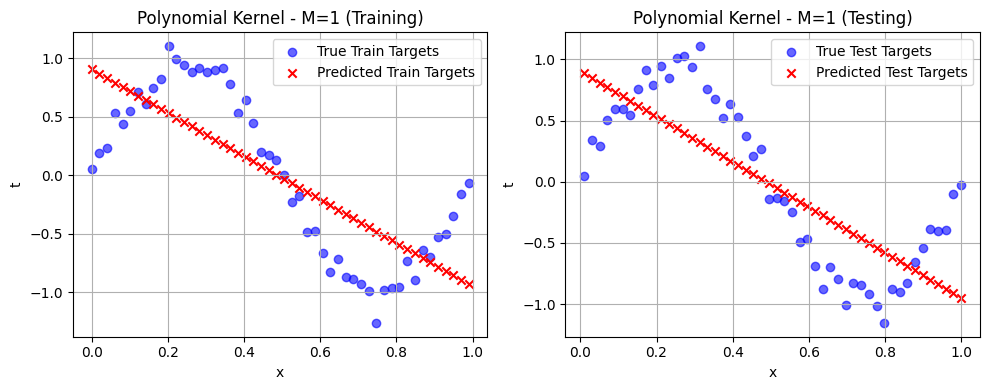

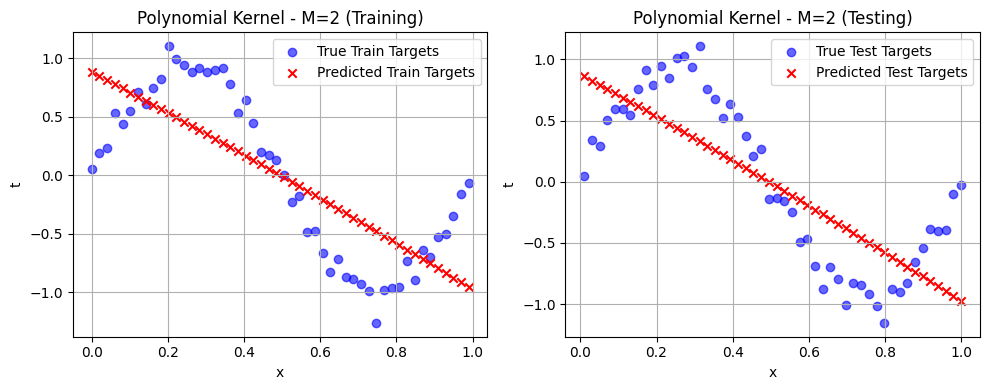

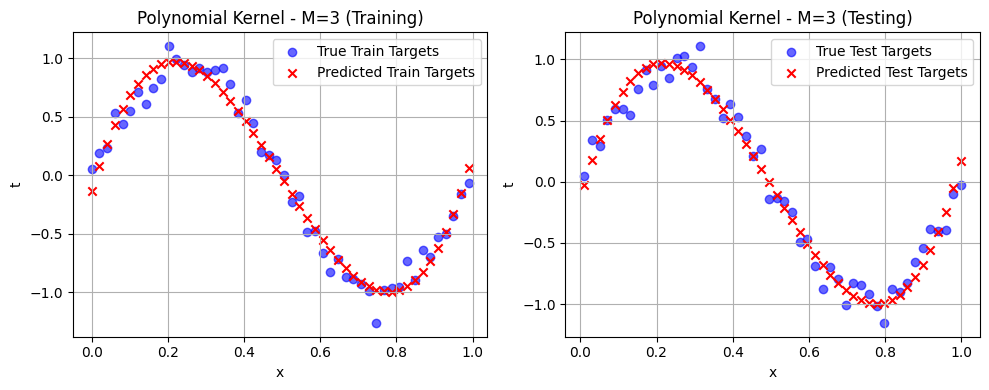

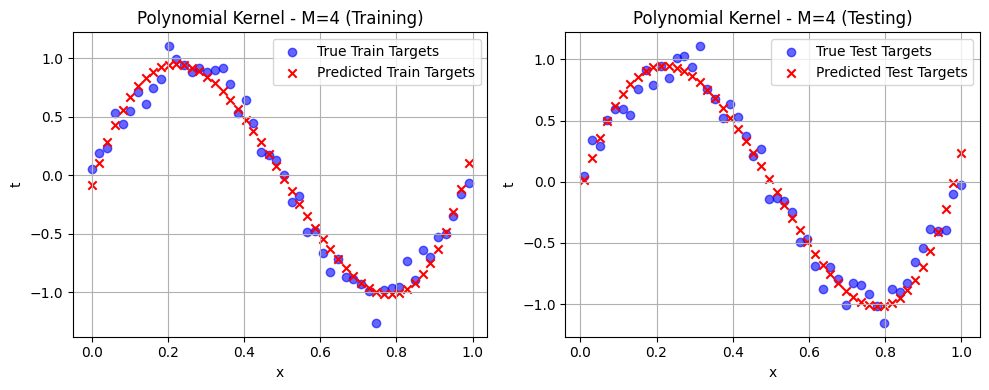

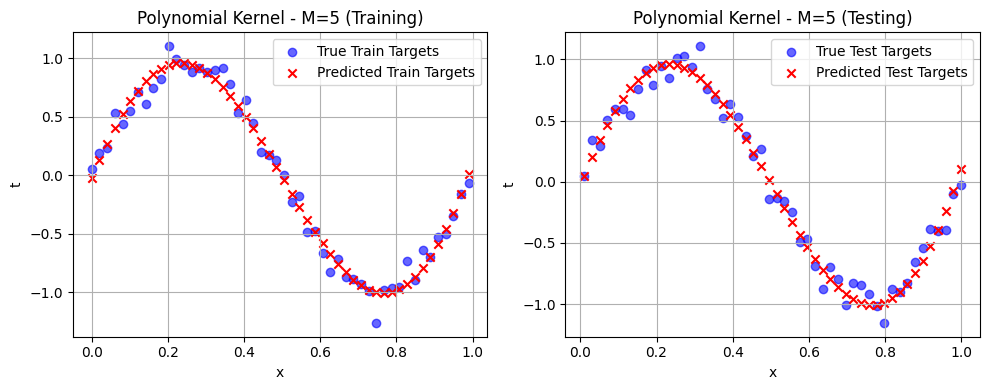

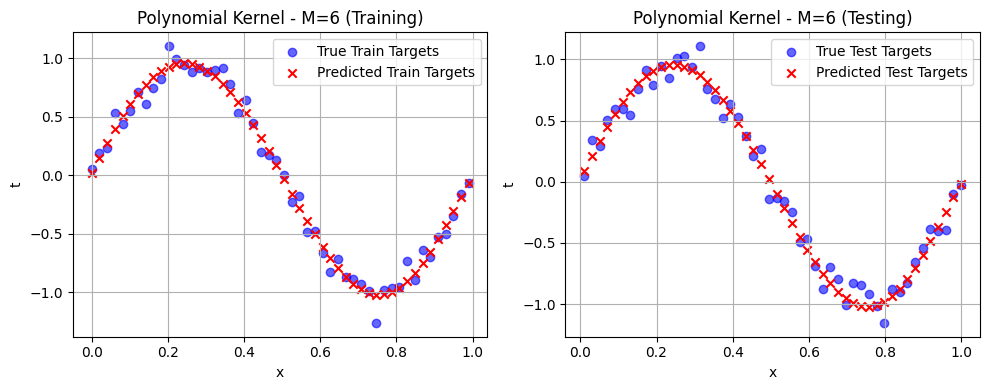

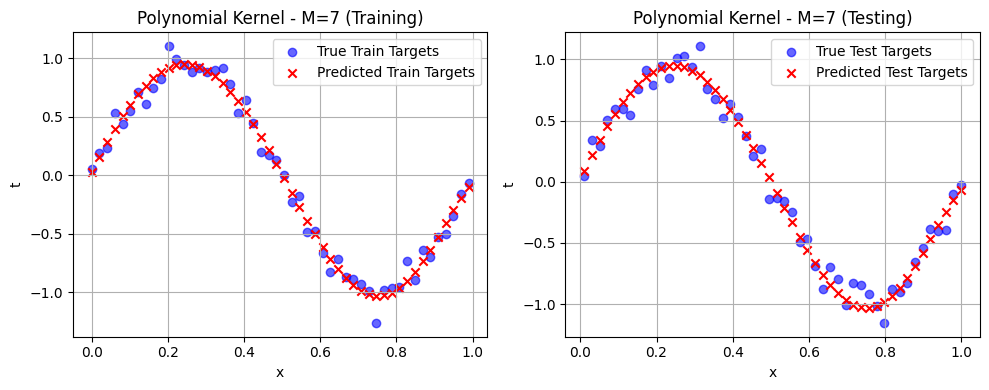

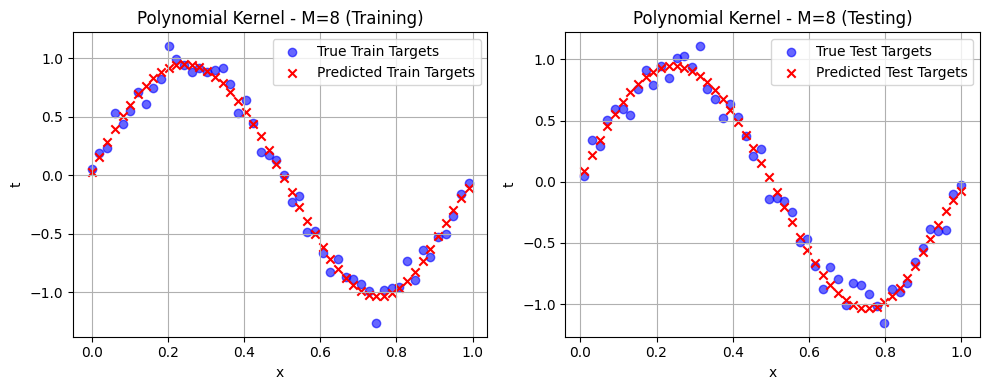

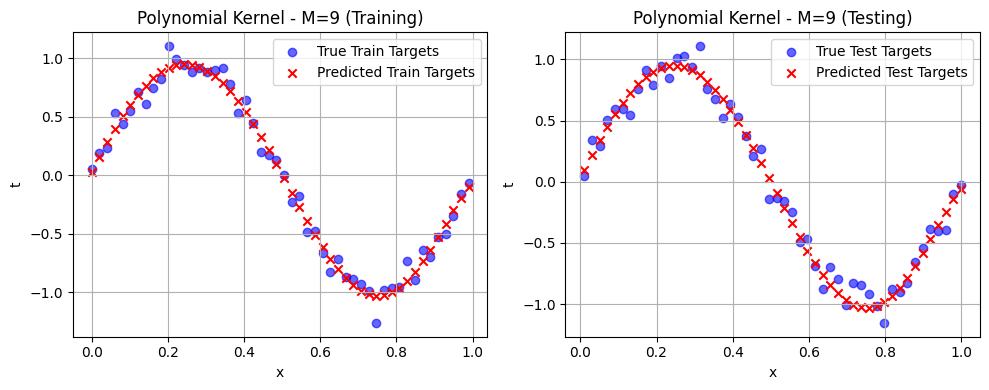

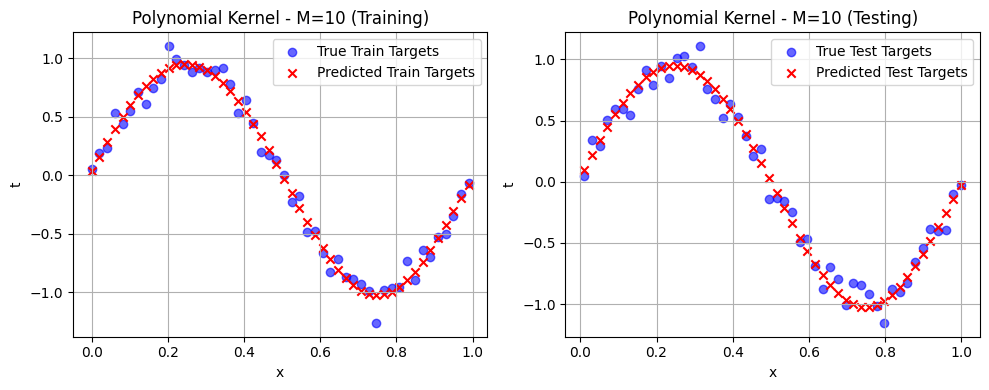

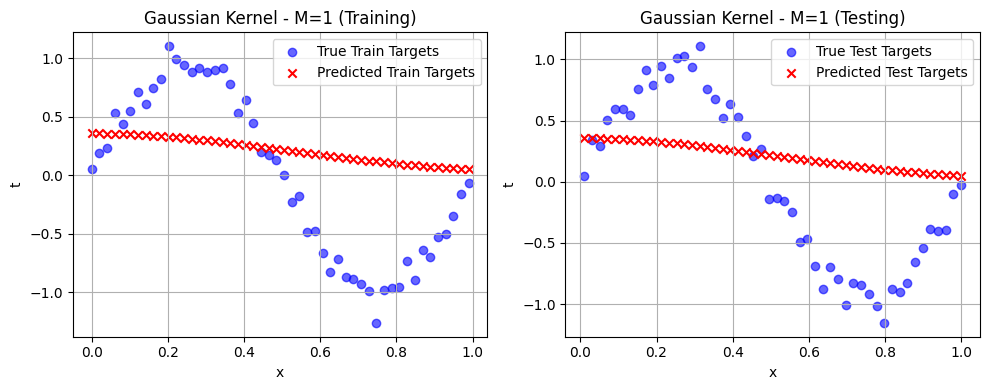

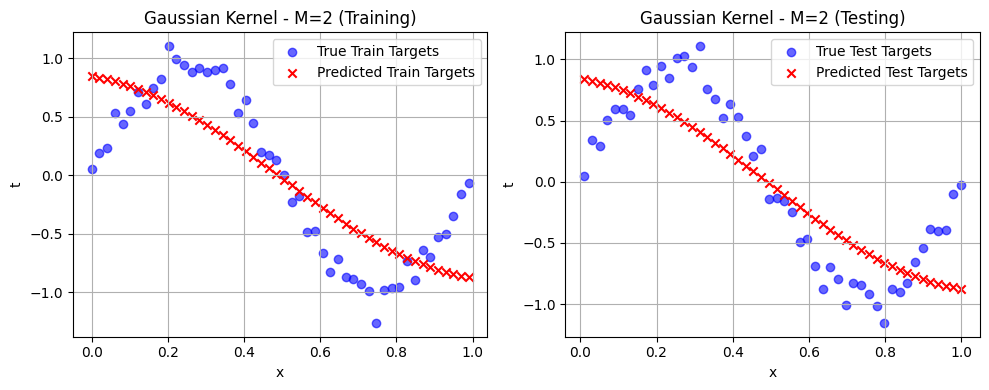

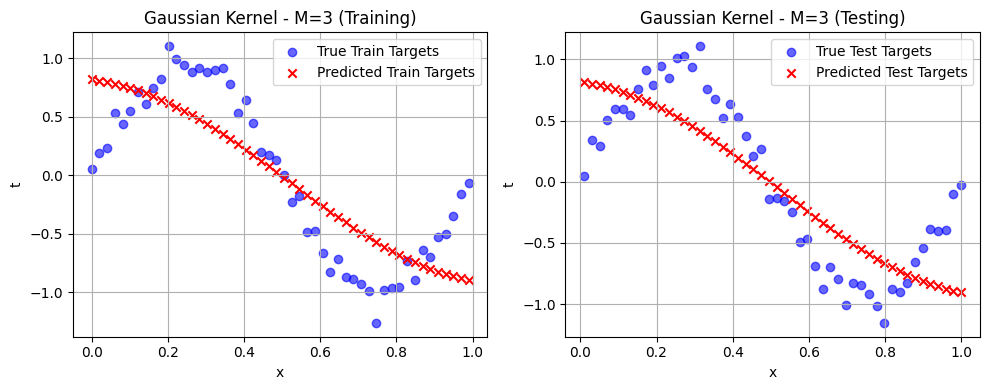

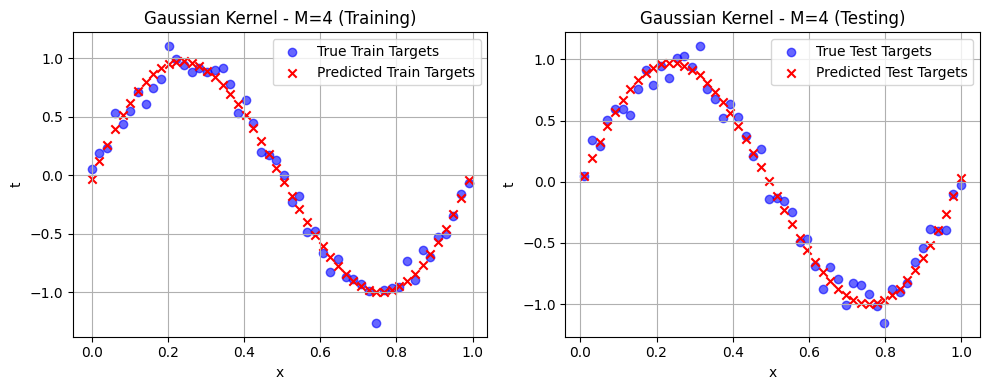

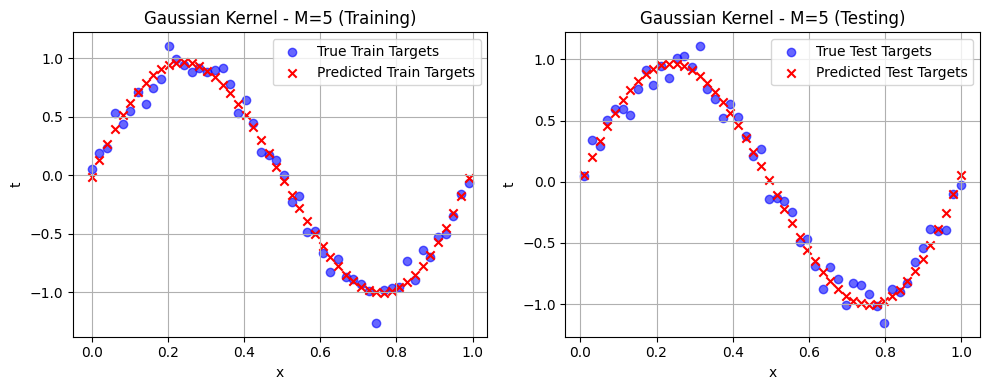

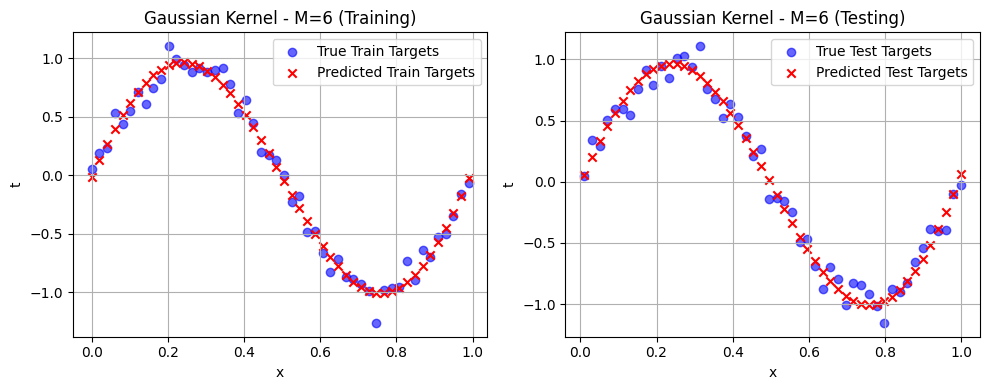

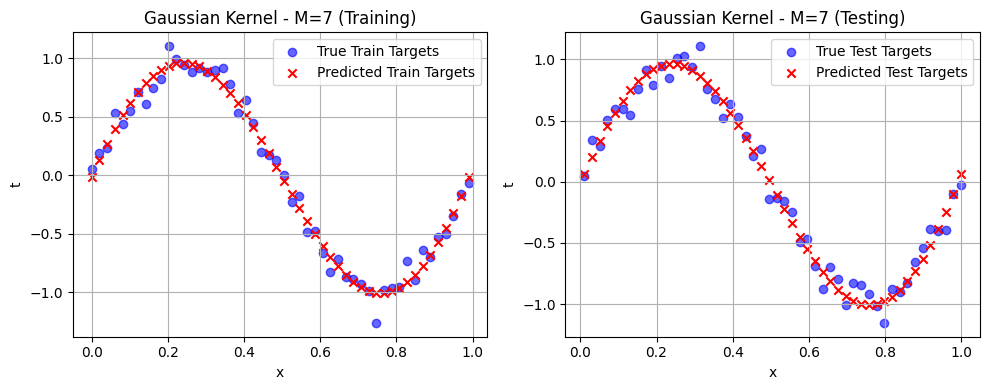

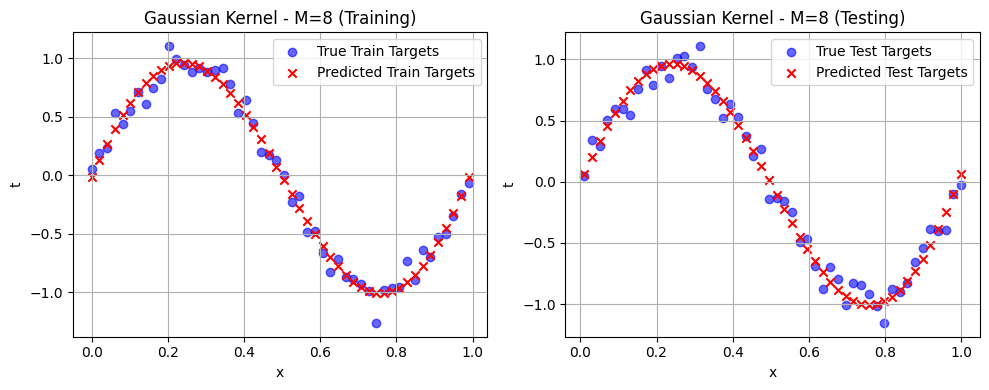

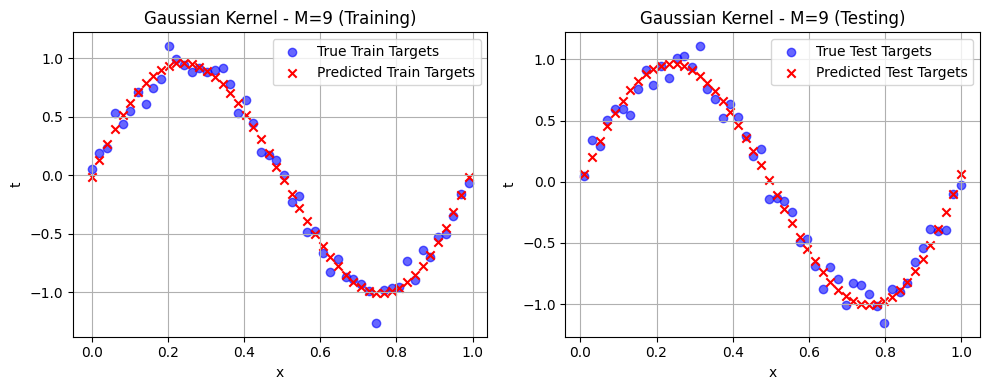

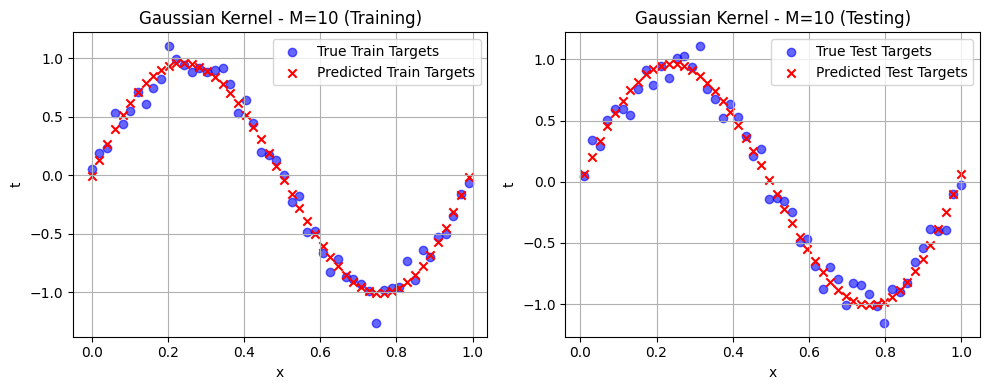

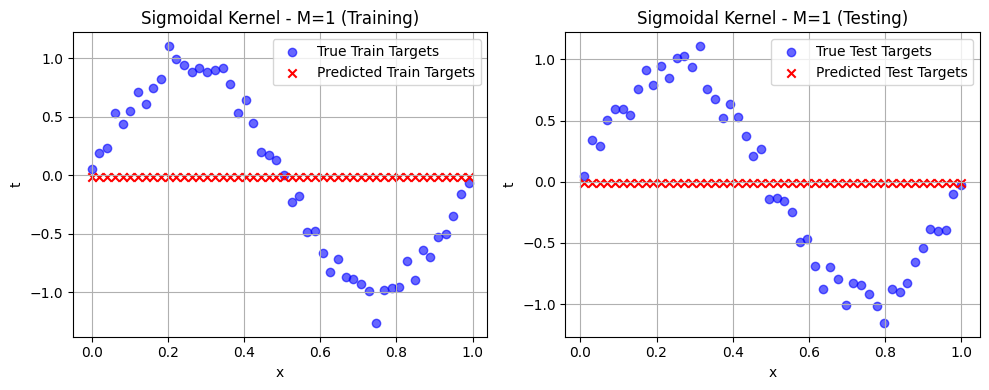

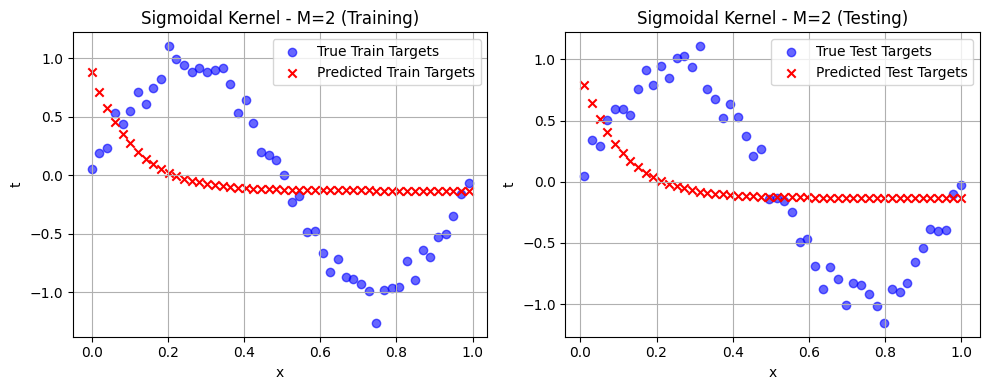

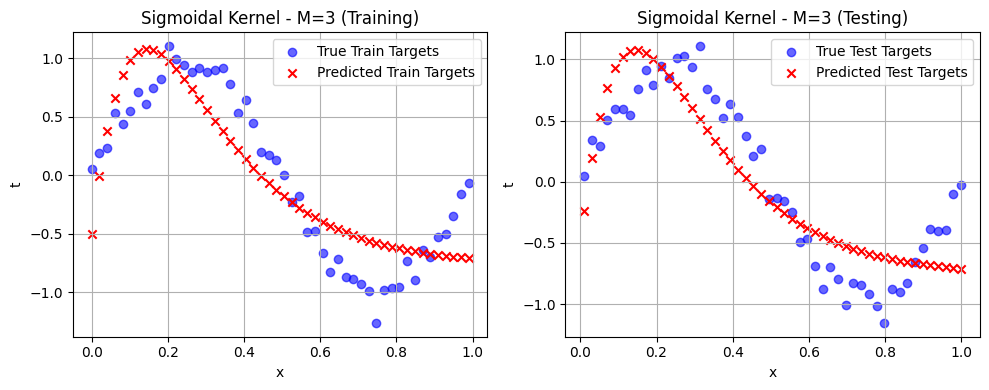

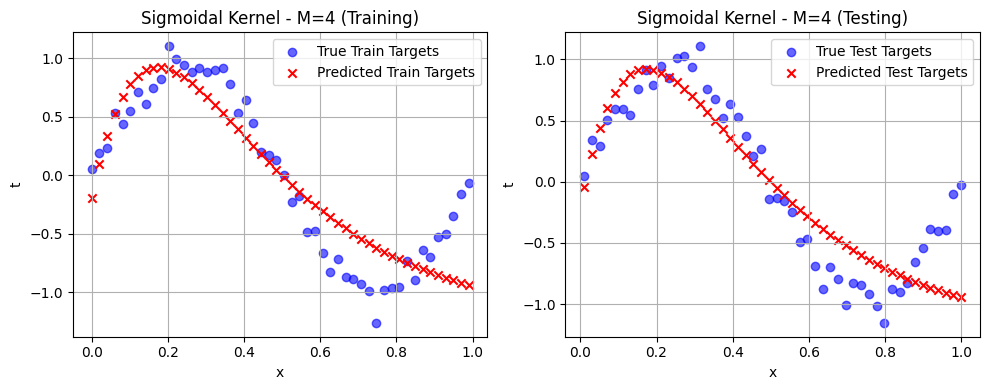

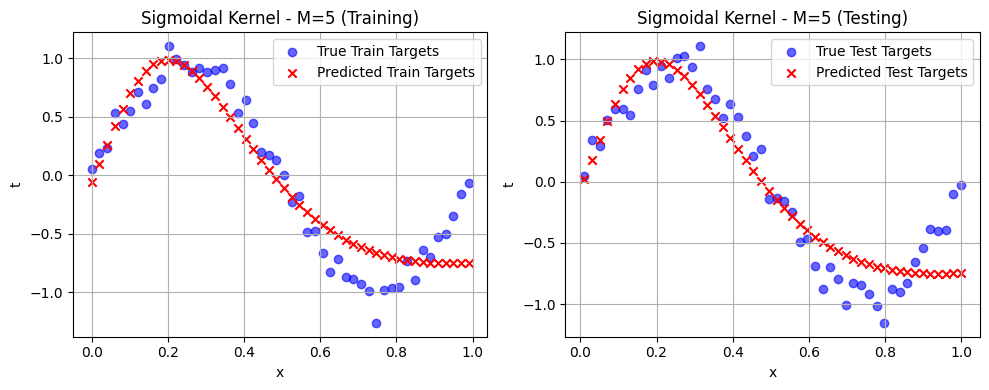

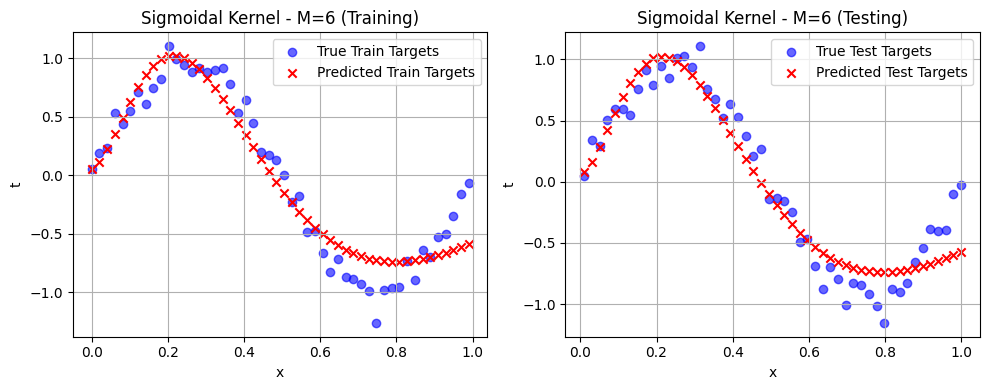

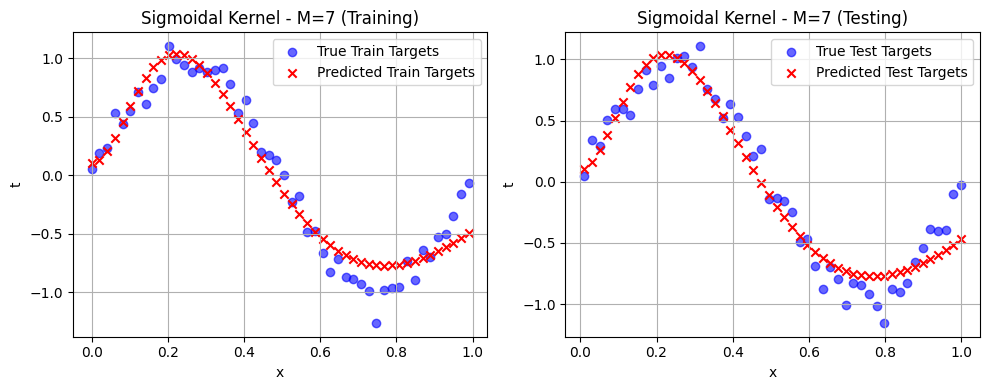

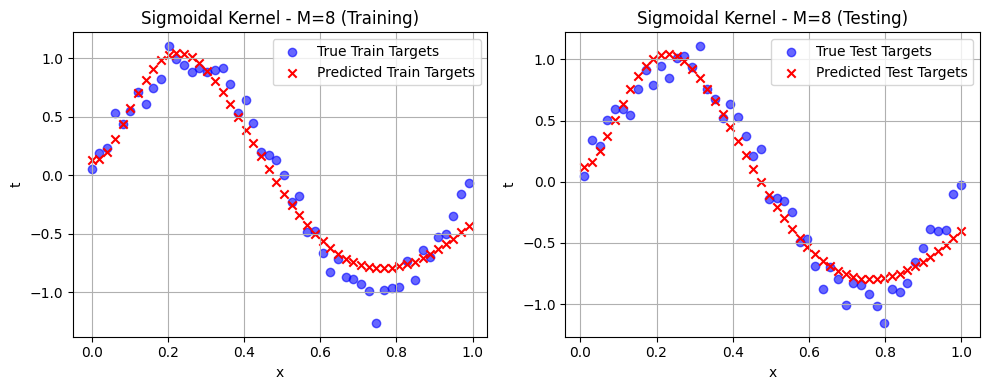

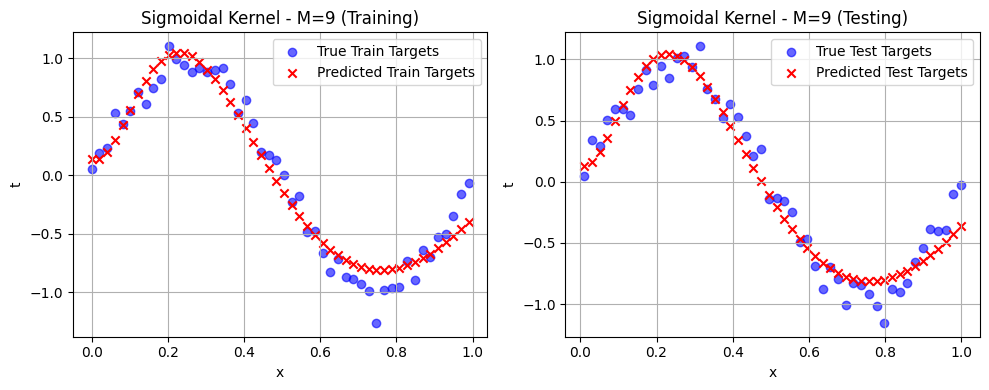

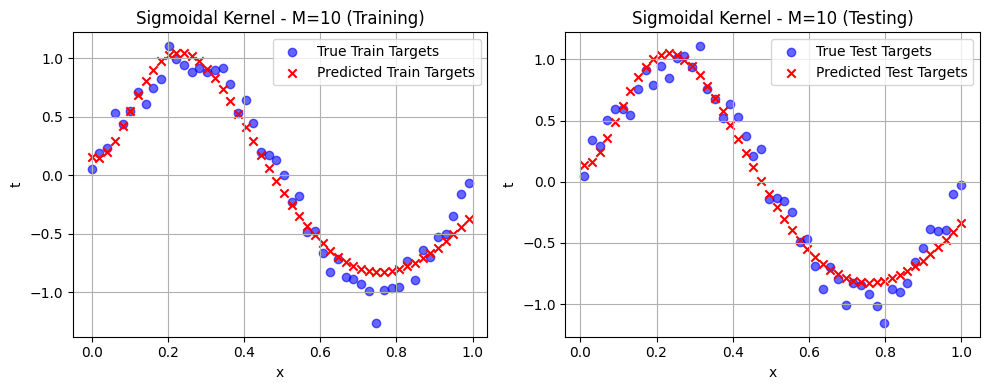

In [60]:
#Plot the predicted training and testing targets alongside the original targets for various model orders and all three different kernels.

for kernel in errors.keys():
    for M in M_range:
        w = KernelRegressionFit(X_train, Y_train, kernel, M)

        _, _, Y_train_pred, Y_test_pred = KernelRegressionPred_Error(
            w, X_train, Y_train, X_test, Y_test, kernel, M
        )


        plt.figure(figsize=(10, 4))

        # Training predictions
        plt.subplot(1, 2, 1)
        plt.scatter(X_train, Y_train, color='blue', label='True Train Targets', alpha=0.6)
        plt.scatter(X_train, Y_train_pred, color='red', label='Predicted Train Targets', marker='x')
        plt.title(f'{kernel.capitalize()} Kernel - M={M} (Training)')
        plt.xlabel("x")
        plt.ylabel("t")
        plt.legend()
        plt.grid(True)

        # Testing predictions
        plt.subplot(1, 2, 2)
        plt.scatter(X_test, Y_test, color='blue', label='True Test Targets', alpha=0.6)
        plt.scatter(X_test, Y_test_pred, color='red', label='Predicted Test Targets', marker='x')
        plt.title(f'{kernel.capitalize()} Kernel - M={M} (Testing)')
        plt.xlabel("x")
        plt.ylabel("t")
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()



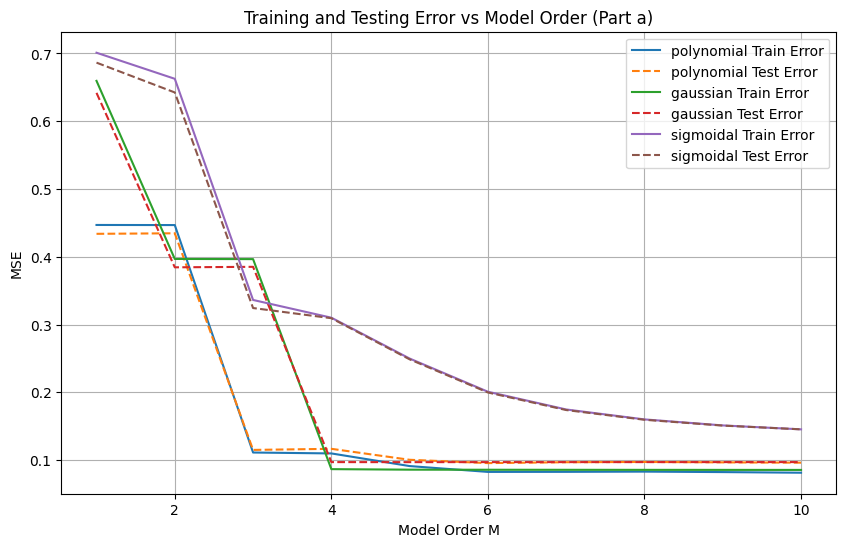

In [61]:
 #Plot training error vs polynomial order and testing error vs polynomial order for all the three different kernels
plt.figure(figsize=(10, 6))
for kernel in errors.keys():
    plt.plot(M_range, errors[kernel][0], label=f'{kernel} Train Error')
    plt.plot(M_range, errors[kernel][1], '--', label=f'{kernel} Test Error')
plt.xlabel("Model Order M")
plt.ylabel("MSE")
plt.title("Training and Testing Error vs Model Order (Part a)")
plt.legend()
plt.grid(True)
plt.show()

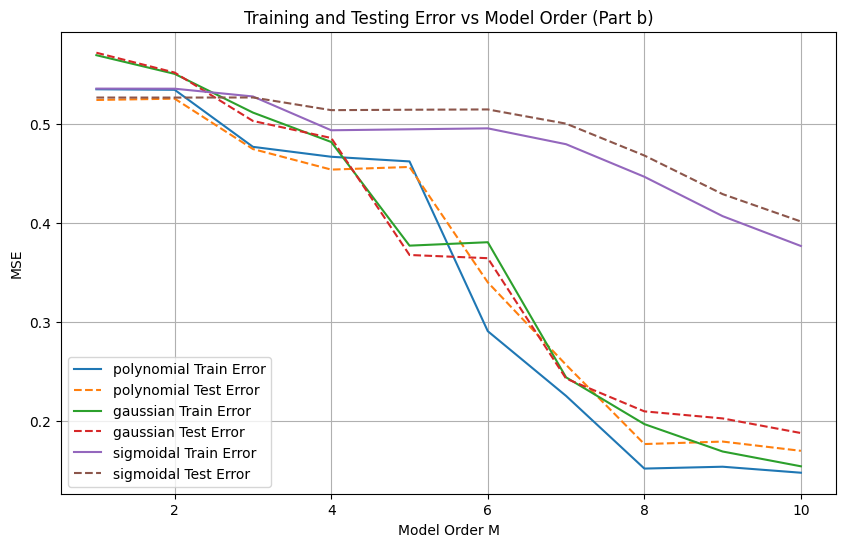

In [62]:
 ###################################################
 #Repeat the experiments by changing target function
 ###################################################
#defining part b
np.random.seed(1)
N = 100
x = np.linspace(0, 3, N)
e = np.random.normal(0, 0.1, N)

# Construct piecewise target
t_b = np.zeros_like(x)
for i, val in enumerate(x):
    if 0 <= val < 1:
        t_b[i] = np.sin(2 * np.pi * val) + e[i]
    elif 1 <= val < 2:
        t_b[i] = 1 - abs(2 * (val - 1.5)) + e[i]  # Triangle centered at 1.5
    else:
        t_b[i] = np.exp(-((val - 2.5)**2) / (2 * 0.1**2)) + e[i]  # Gaussian bump

# Split into train/test
X_train = x[::2]
Y_train = t_b[::2]
X_test = x[1::2]
Y_test = t_b[1::2]


# Repeat error analysis
errors_b = {'polynomial': [], 'gaussian': [], 'sigmoidal': []}
for kernel in errors_b.keys():
    tr_errs, te_errs = [], []
    for M in M_range:
        w = KernelRegressionFit(X_train, Y_train, kernel, M)
        tr_e, te_e, _, _ = KernelRegressionPred_Error(w, X_train, Y_train, X_test, Y_test, kernel, M)
        tr_errs.append(tr_e)
        te_errs.append(te_e)
    errors_b[kernel] = (tr_errs, te_errs)

# Plot results for part (b)
plt.figure(figsize=(10, 6))
for kernel in errors_b.keys():
    plt.plot(M_range, errors_b[kernel][0], label=f'{kernel} Train Error')
    plt.plot(M_range, errors_b[kernel][1], '--', label=f'{kernel} Test Error')
plt.xlabel("Model Order M")
plt.ylabel("MSE")
plt.title("Training and Testing Error vs Model Order (Part b)")
plt.legend()
plt.grid(True)
plt.show()


#OBSERVATIONS
1.Polynomial kernels fit the smooth sinusoidal curve in part (a) quite well,
but they couldn't capture the sharp changes and localized bump in part (b).

2.Gaussian kernels performed the best overall,
as they could model both smooth and complex shapes due to their flexibility.

3.Sigmoidal kernels gave moderate results in both parts,
but lacked the adaptability of the Gaussian kernel for varied patterns.

4.For all kernels, training error decreased with increasing model order,
while test error reduced initially and then increased or flattened due to overfitting.

5.Choosing good values for sigma (Gaussian) and alpha (sigmoidal) helped performance,
but the kernel type and model complexity were more important overall.



#Part - (4) : Understanding training Parameters

In [63]:
def ErrorPred(w_est, X_train, Y_train, X_test, Y_test, kernelType):
    """Compute training and testing errors for given weights"""
    n_train = len(X_train)
    n_test = len(X_test)

    if kernelType == 'polynomial':
        M = len(w_est) - 1  # For polynomial, M+1 weights
        # Create polynomial features
        X_tr = np.zeros((n_train, M+1))
        X_te = np.zeros((n_test, M+1))
        for i in range(n_train):
            for j in range(M+1):
                X_tr[i, j] = X_train[i] ** j
        for i in range(n_test):
            for j in range(M+1):
                X_te[i, j] = X_test[i] ** j

    elif kernelType == 'gaussian':
        M = len(w_est)  # For Gaussian, M weights (no +1)
        # Create Gaussian kernel features
        centers = np.linspace(min(X_train), max(X_train), M)
        sigma = 0.5
        X_tr = np.zeros((n_train, M))
        X_te = np.zeros((n_test, M))

        for i in range(n_train):
            for j in range(M):
                X_tr[i, j] = np.exp(-((X_train[i] - centers[j])**2) / (2 * sigma**2))
        for i in range(n_test):
            for j in range(M):
                X_te[i, j] = np.exp(-((X_test[i] - centers[j])**2) / (2 * sigma**2))

    elif kernelType == 'sigmoidal':
        M = len(w_est)  # For sigmoidal, M weights (no +1)
        # Create sigmoidal kernel features
        centers = np.linspace(min(X_train), max(X_train), M)
        alpha = 5
        c = 1
        X_tr = np.zeros((n_train, M))
        X_te = np.zeros((n_test, M))

        for i in range(n_train):
            for j in range(M):
                X_tr[i, j] = np.tanh(alpha * X_train[i] * centers[j] + c)
        for i in range(n_test):
            for j in range(M):
                X_te[i, j] = np.tanh(alpha * X_test[i] * centers[j] + c)

    # Compute predictions
    Y_train_pred = np.dot(X_tr, w_est)
    Y_test_pred = np.dot(X_te, w_est)

    # Compute errors (MSE)
    TrainError = np.mean((Y_train - Y_train_pred)**2)
    TestError = np.mean((Y_test - Y_test_pred)**2)

    return TrainError, TestError


In [64]:
def Training(X_train, Y_train, X_test, Y_test, kernelType, M, Epochs, BatchSize, stepSize):
    """Train using Stochastic Gradient Descent"""
    n_train = len(X_train)

    # Initialize weights randomly
    if kernelType == 'polynomial':
        weights = np.random.normal(0, 0.1, M+1)
    else:
        weights = np.random.normal(0, 0.1, M)

    # Storage for errors
    train_errors = []
    test_errors = []

    # Number of batches
    batches = max(1, n_train // BatchSize)

    for epoch in range(Epochs):
        # Compute current errors
        tr_err, te_err = ErrorPred(weights, X_train, Y_train, X_test, Y_test, kernelType)


        train_errors.append(tr_err)
        test_errors.append(te_err)

        # Shuffle data
        indices = np.random.permutation(n_train)
        X_shuffled = X_train[indices]
        Y_shuffled = Y_train[indices]

        # Process batches
        for batch in range(batches):
            # Get batch data
            start_idx = batch * BatchSize
            end_idx = min((batch + 1) * BatchSize, n_train)
            X_batch = X_shuffled[start_idx:end_idx]
            Y_batch = Y_shuffled[start_idx:end_idx]

            # Initialize gradient accumulator
            gradient_sum = np.zeros_like(weights)
            batch_size_actual = len(X_batch)

            # Process each sample in batch
            for i in range(batch_size_actual):
                x_i = X_batch[i]
                y_i = Y_batch[i]

                # Create feature vector for this sample
                if kernelType == 'polynomial':
                    phi_i = np.array([x_i**j for j in range(M+1)])
                elif kernelType == 'gaussian':
                    centers = np.linspace(min(X_train), max(X_train), M)
                    sigma = 0.5
                    phi_i = np.array([np.exp(-((x_i - centers[j])**2) / (2 * sigma**2)) for j in range(M)])
                elif kernelType == 'sigmoidal':
                    centers = np.linspace(min(X_train), max(X_train), M)
                    alpha = 5
                    c = 1
                    phi_i = np.array([np.tanh(alpha * x_i * centers[j] + c) for j in range(M)])

                # Compute prediction and error
                y_pred = np.dot(phi_i, weights)
                error = y_pred - y_i

                # Compute gradient: ∇w = 2 * error * phi_i
                gradient = 2 * error * phi_i
                gradient_sum += gradient

            # Update weights using average gradient
            avg_gradient = gradient_sum / batch_size_actual
            weights -= stepSize * avg_gradient

    # Plot training and testing errors
    plt.figure(figsize=(10, 6))
    plt.plot(range(Epochs), train_errors, label='Training Error', color='blue')
    plt.plot(range(Epochs), test_errors, label='Testing Error', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.title(f'Training Progress - {kernelType} kernel, M={M}, BatchSize={BatchSize}, StepSize={stepSize}')
    plt.legend()
    plt.grid(True)
    plt.show()

    return weights


In [65]:
def Pred(w_est, X_train, X_test, kernelType):
    """Make predictions on training and test data"""
    M = len(w_est) - 1 if kernelType == 'polynomial' else len(w_est)
    n_train = len(X_train)
    n_test = len(X_test)

    # Create feature matrices (same logic as in ErrorPred)
    if kernelType == 'polynomial':
        X_tr = np.zeros((n_train, M+1))
        X_te = np.zeros((n_test, M+1))
        for i in range(n_train):
            for j in range(M+1):
                X_tr[i, j] = X_train[i] ** j
        for i in range(n_test):
            for j in range(M+1):
                X_te[i, j] = X_test[i] ** j
    # ... (similar for gaussian and sigmoidal)

    Y_tr_pred = np.dot(X_tr, w_est)
    Y_te_pred = np.dot(X_te, w_est)

    return Y_tr_pred, Y_te_pred

def Pred_Error(w_est, X_train, Y_train, X_test, Y_test, kernelType):
    """Compute prediction errors"""
    Y_tr_pred, Y_te_pred = Pred(w_est, X_train, X_test, kernelType)

    Y_tr_error = np.mean((Y_train - Y_tr_pred)**2)
    Y_te_error = np.mean((Y_test - Y_te_pred)**2)

    return Y_tr_error, Y_te_error


=== Studying Effect of Step Size ===

Step Size: 0.0001


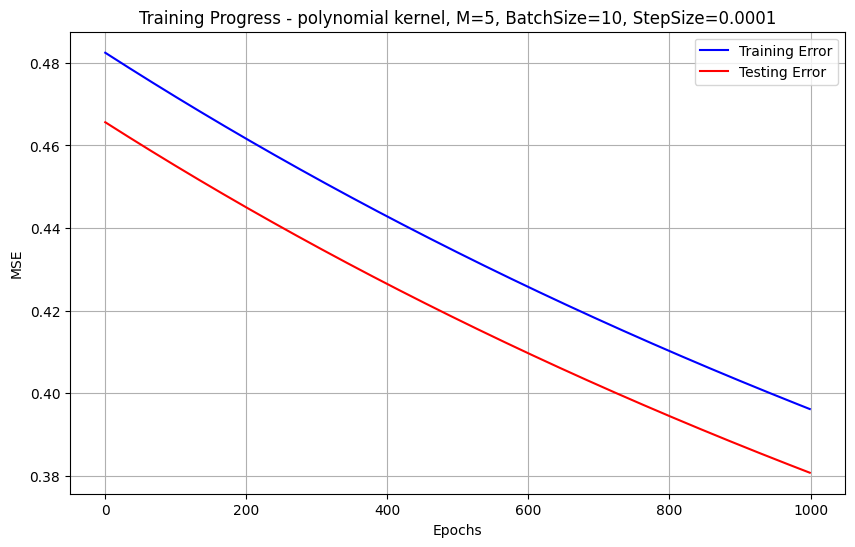

SGD weights: [ 0.00522117 -0.10329544 -0.11752377 -0.15305282 -0.07426735]...
Closed-form weights: [ 0.37187235  3.71835388 -8.15760657 -3.78366445  2.08954931]...
Weight difference (L2 norm): 11.5415

Step Size: 0.0005


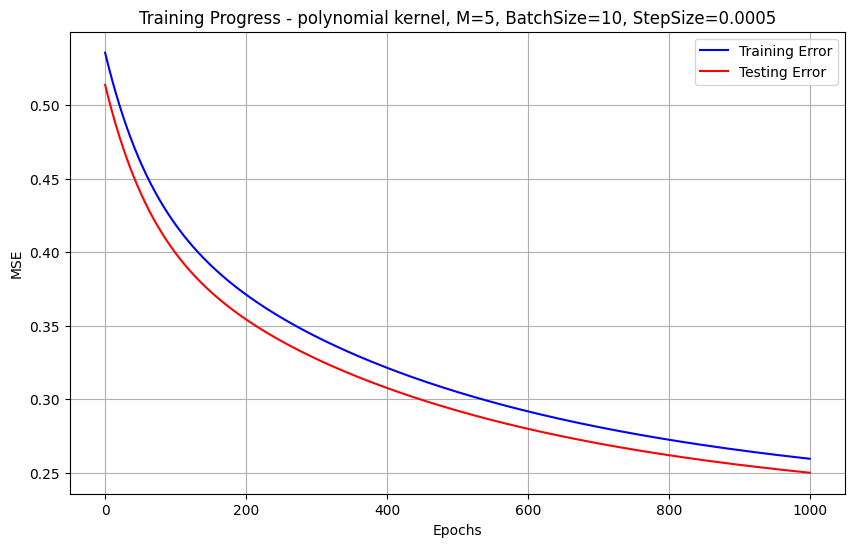

SGD weights: [ 0.36635817 -0.37890667 -0.43909039 -0.25864882 -0.02164246]...
Closed-form weights: [ 0.37187235  3.71835388 -8.15760657 -3.78366445  2.08954931]...
Weight difference (L2 norm): 11.4476

Step Size: 0.001


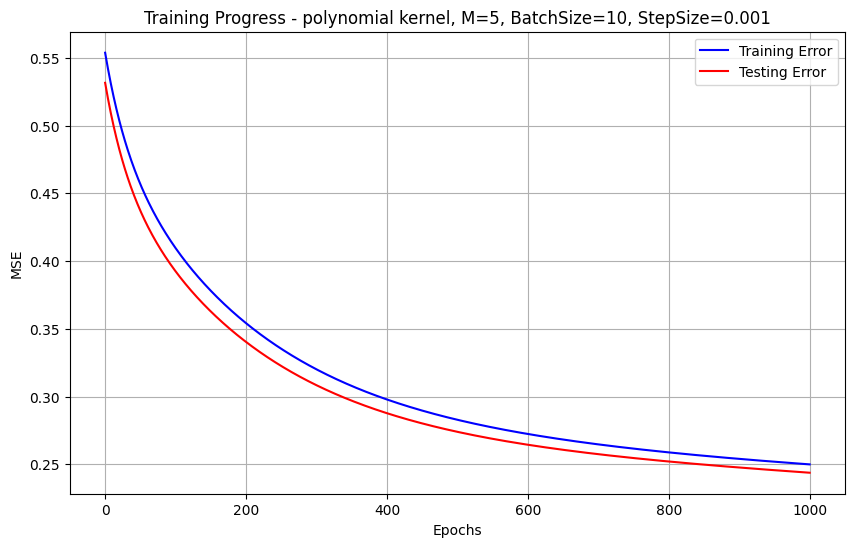

SGD weights: [ 0.47808495 -0.50013521 -0.33937458 -0.26210869 -0.29133803]...
Closed-form weights: [ 0.37187235  3.71835388 -8.15760657 -3.78366445  2.08954931]...
Weight difference (L2 norm): 11.6251

Step Size: 0.01


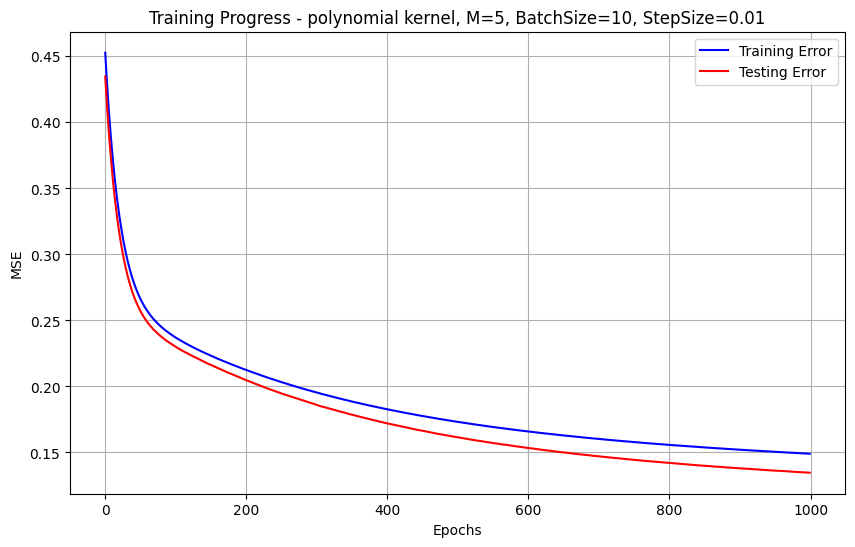

SGD weights: [ 0.8905648  -1.28903045 -1.32030051 -0.43358165  0.39201916]...
Closed-form weights: [ 0.37187235  3.71835388 -8.15760657 -3.78366445  2.08954931]...
Weight difference (L2 norm): 10.4491

Step Size: 0.1


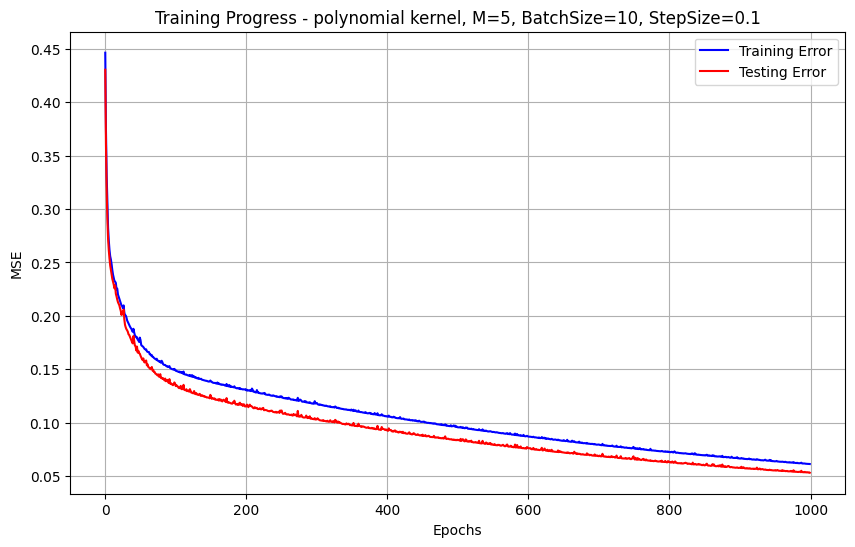

SGD weights: [ 0.62880004  1.41602559 -5.04248146 -2.64148873  1.07438097]...
Closed-form weights: [ 0.37187235  3.71835388 -8.15760657 -3.78366445  2.08954931]...
Weight difference (L2 norm): 4.4240

Step Size: 0.5


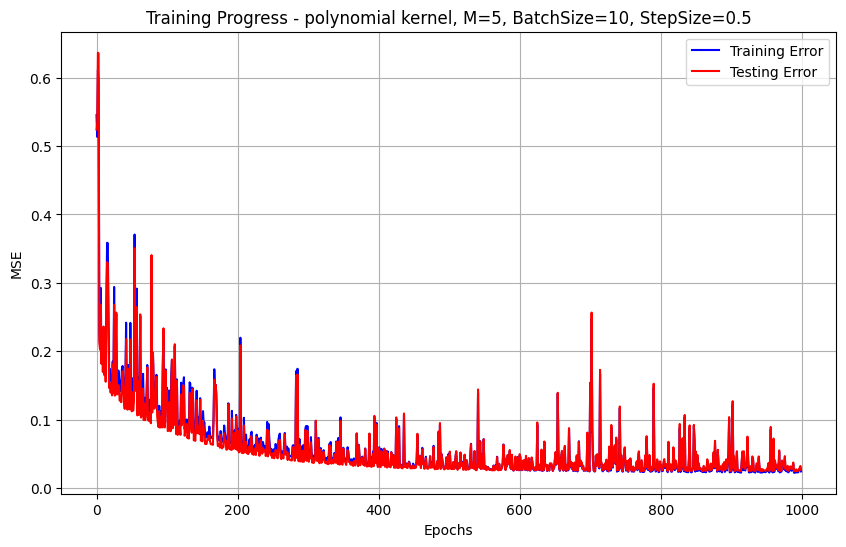

SGD weights: [ 0.08584057  5.07265162 -9.86338514 -4.83443273  2.27550578]...
Closed-form weights: [ 0.37187235  3.71835388 -8.15760657 -3.78366445  2.08954931]...
Weight difference (L2 norm): 2.8554

=== Studying Effect of Batch Size ===

Batch Size: 1


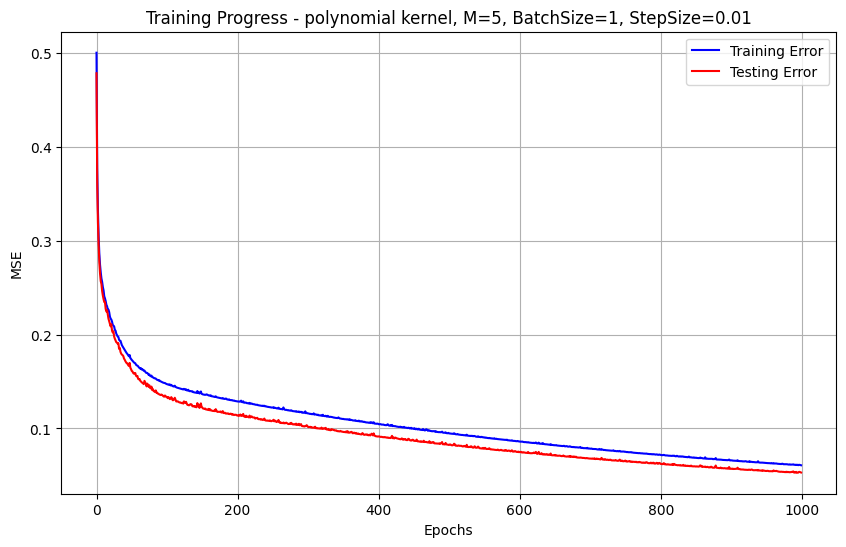


Batch Size: 5


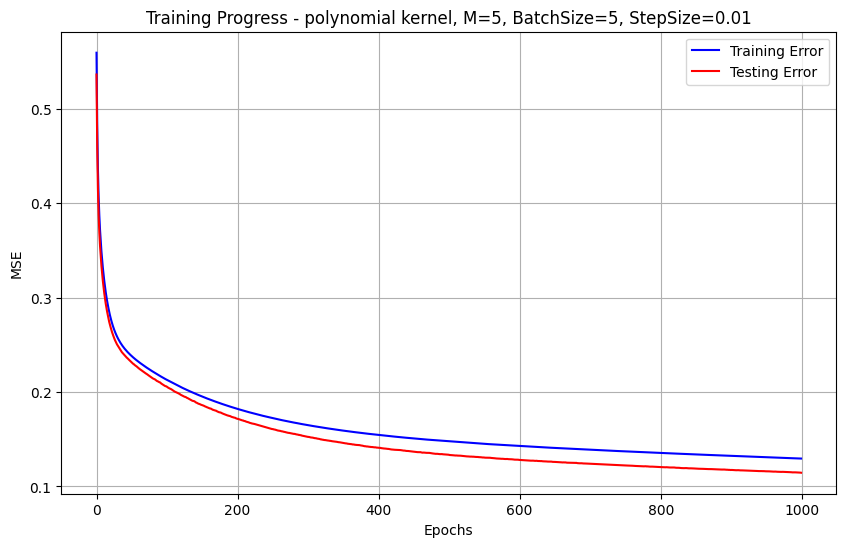


Batch Size: 10


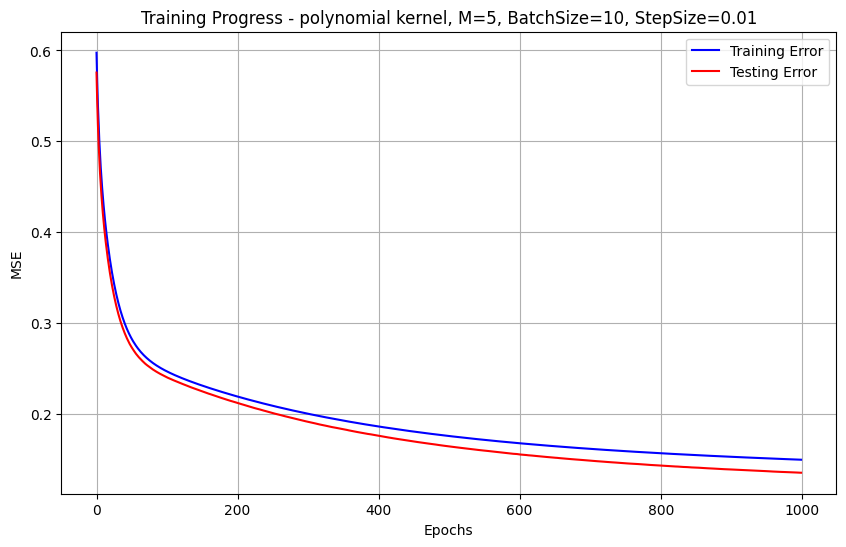


Batch Size: 25


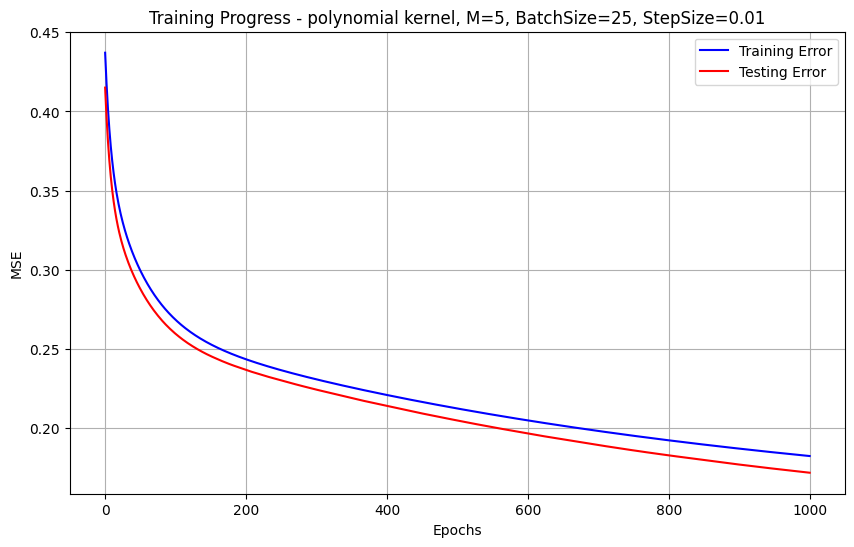


=== Comprehensive Comparison Across Kernels ===

--- POLYNOMIAL KERNEL ---


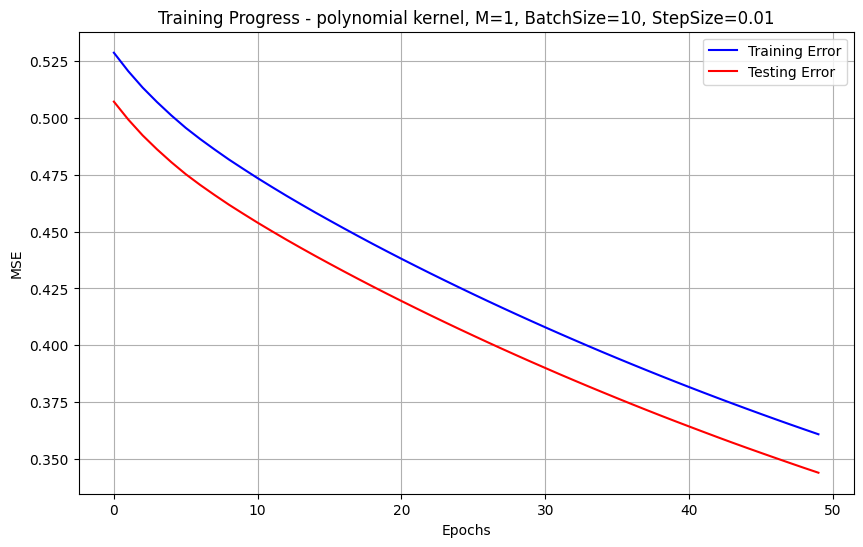

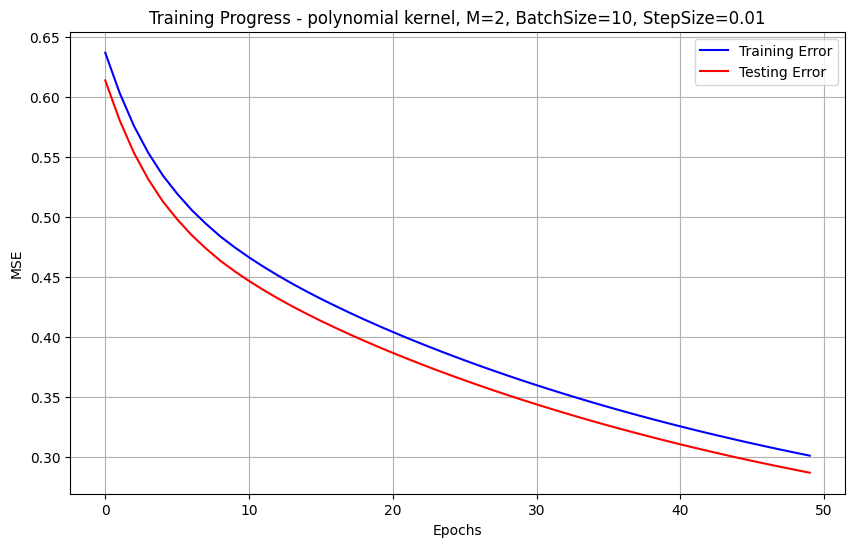

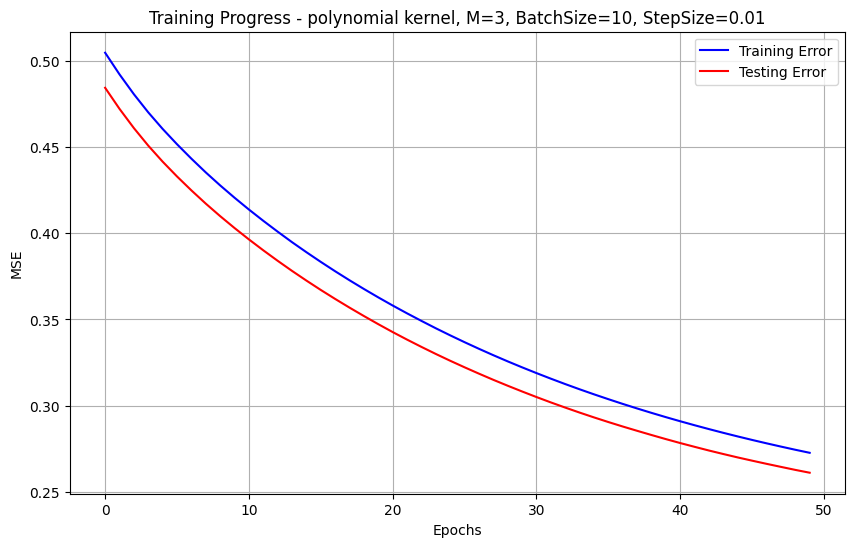

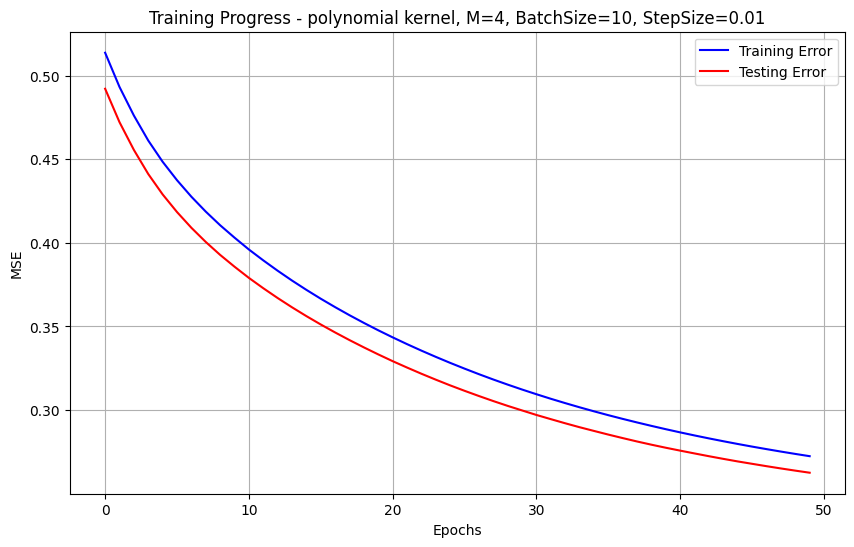

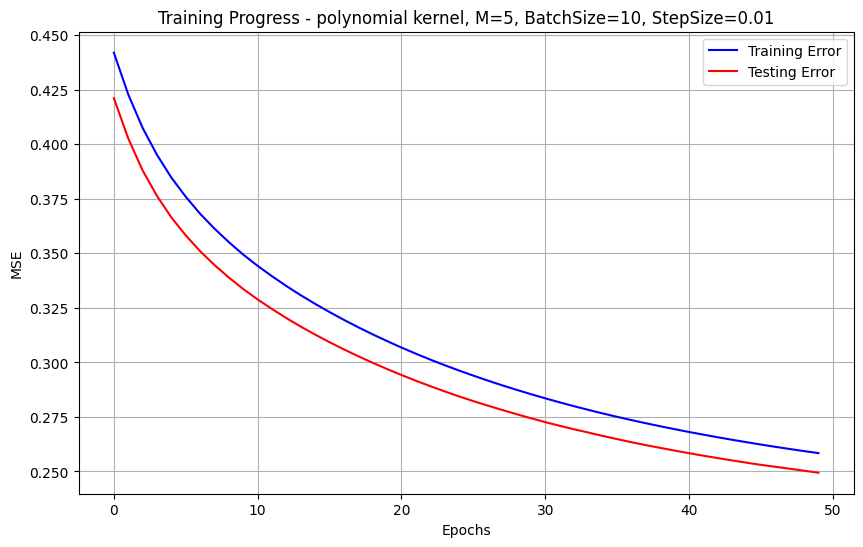

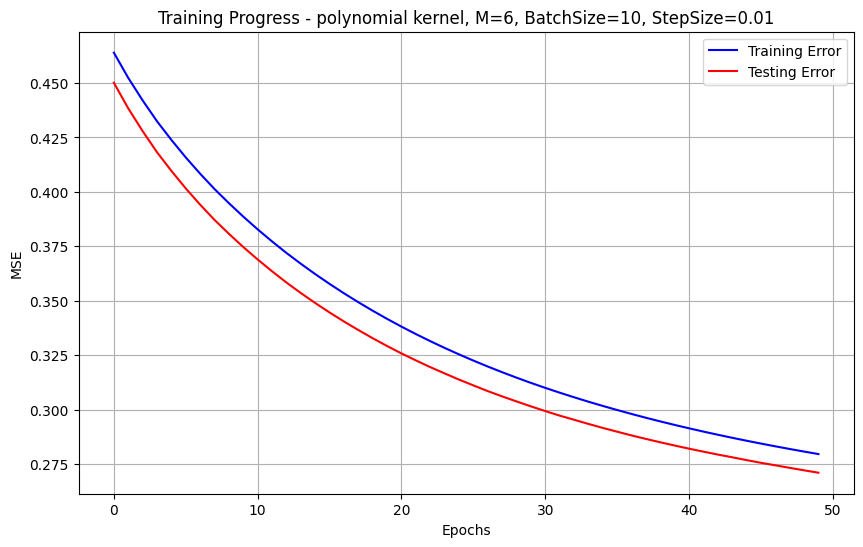

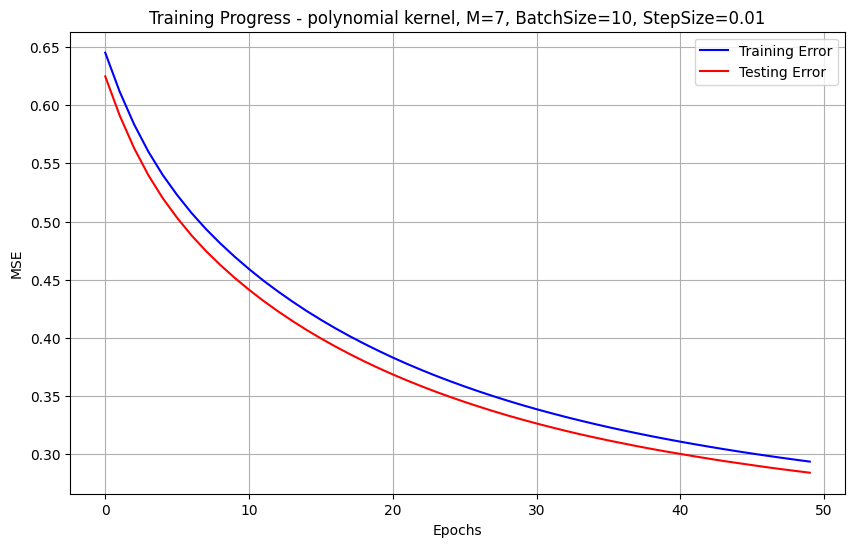

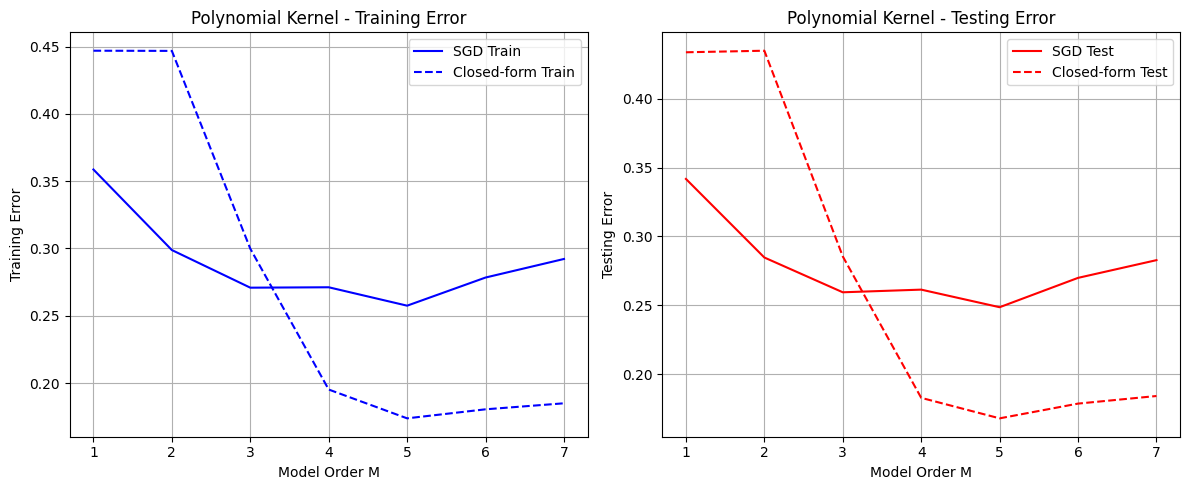


--- GAUSSIAN KERNEL ---


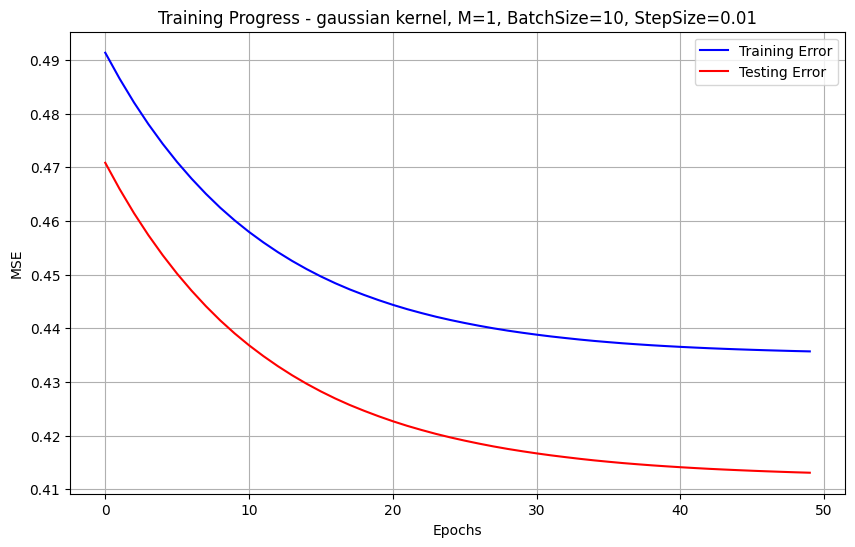

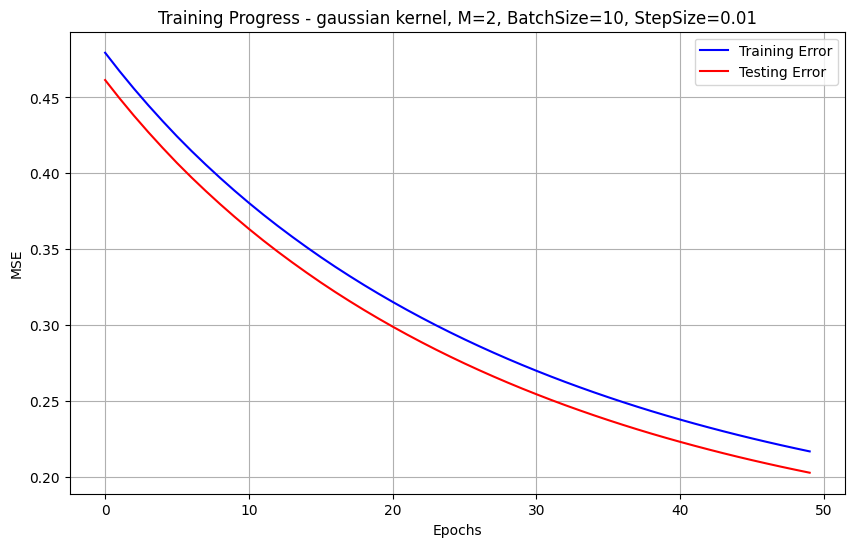

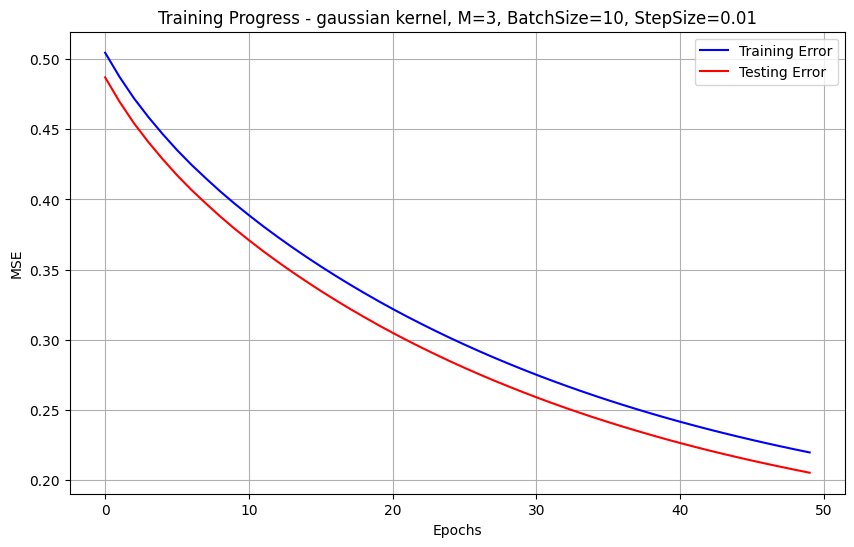

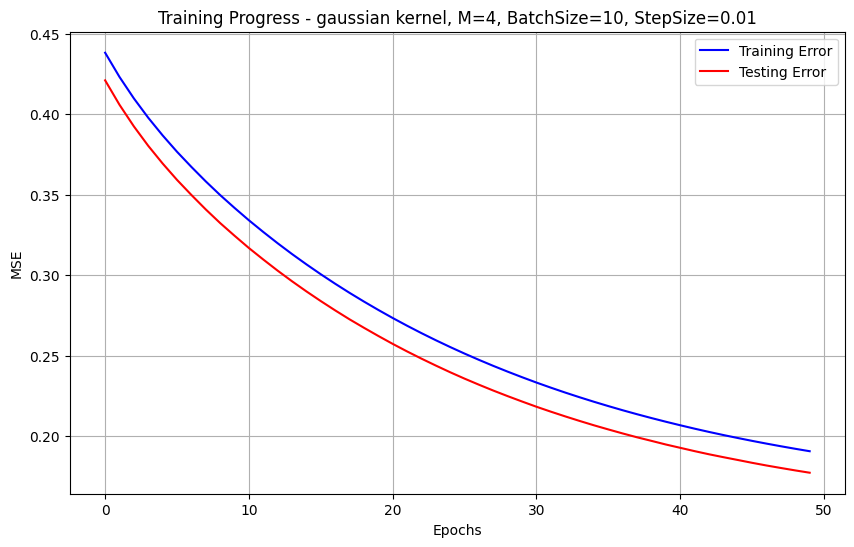

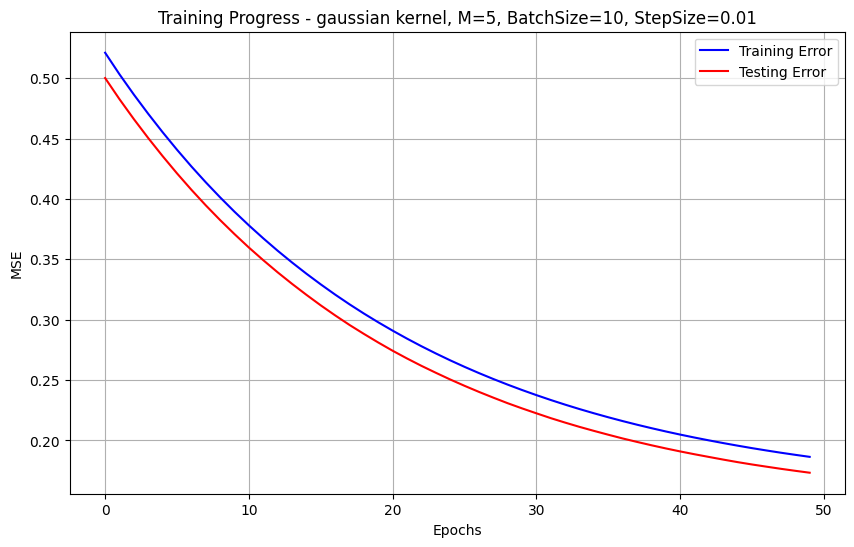

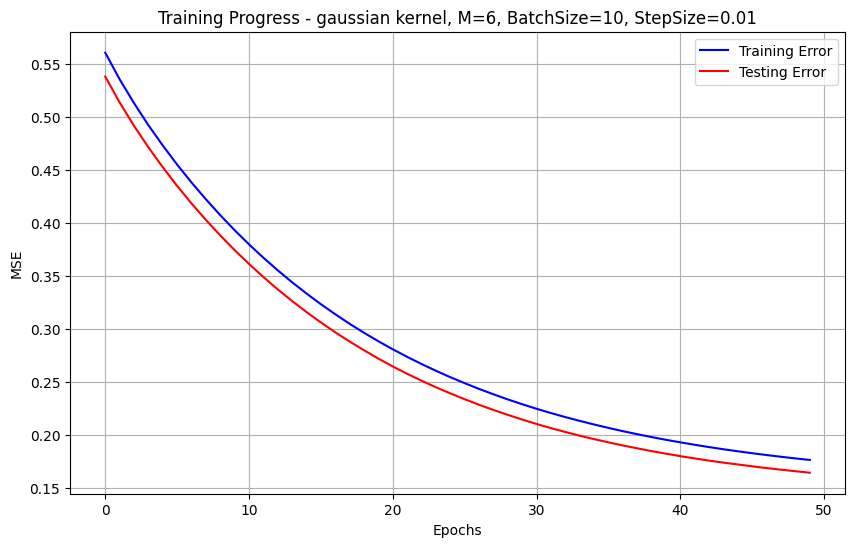

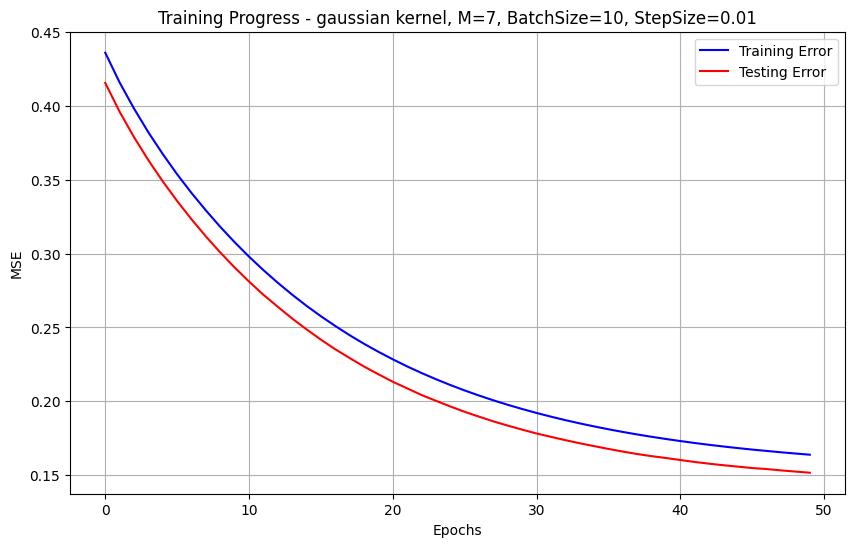

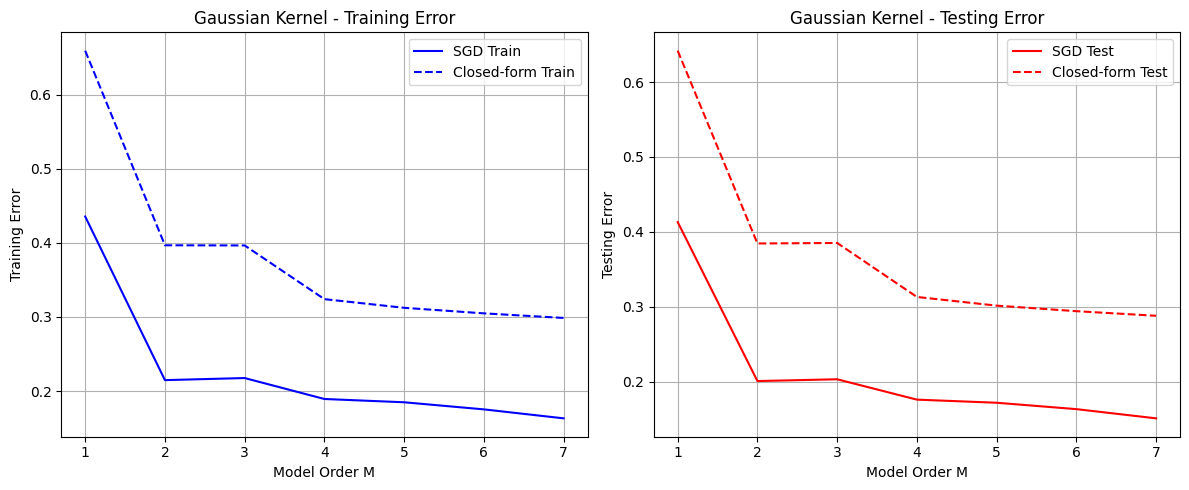


--- SIGMOIDAL KERNEL ---


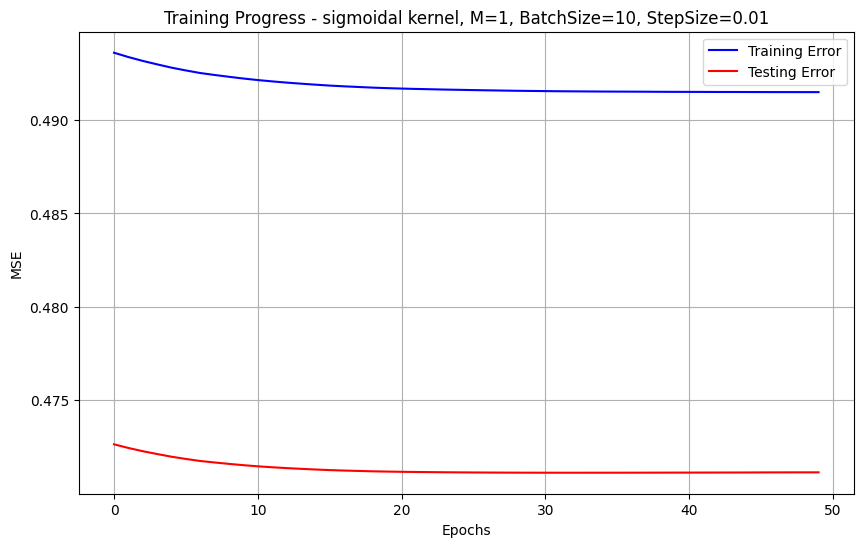

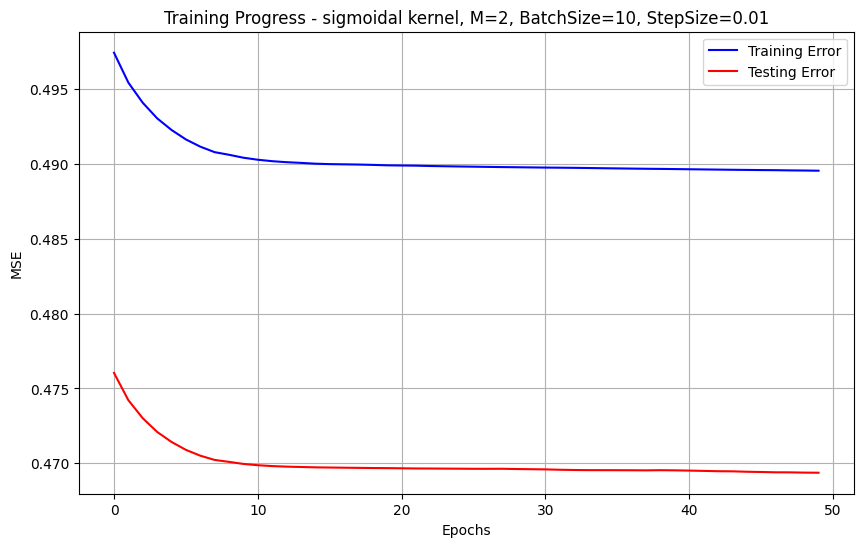

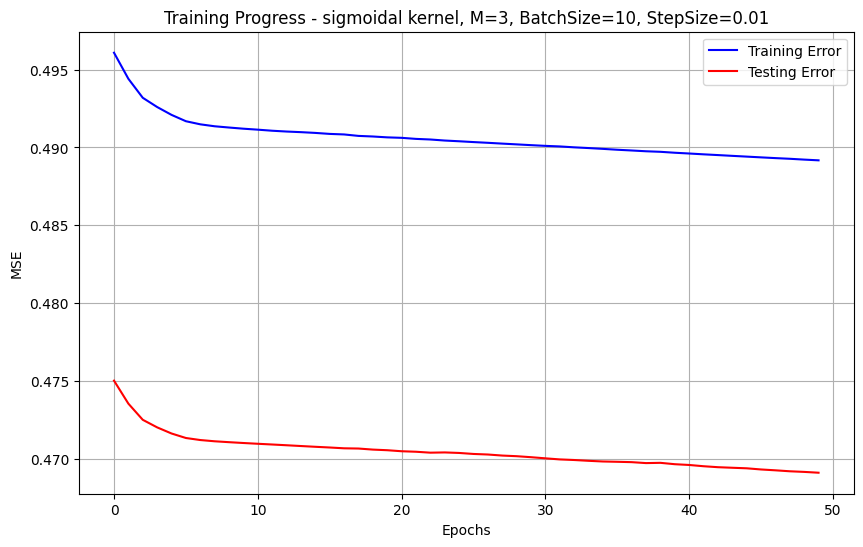

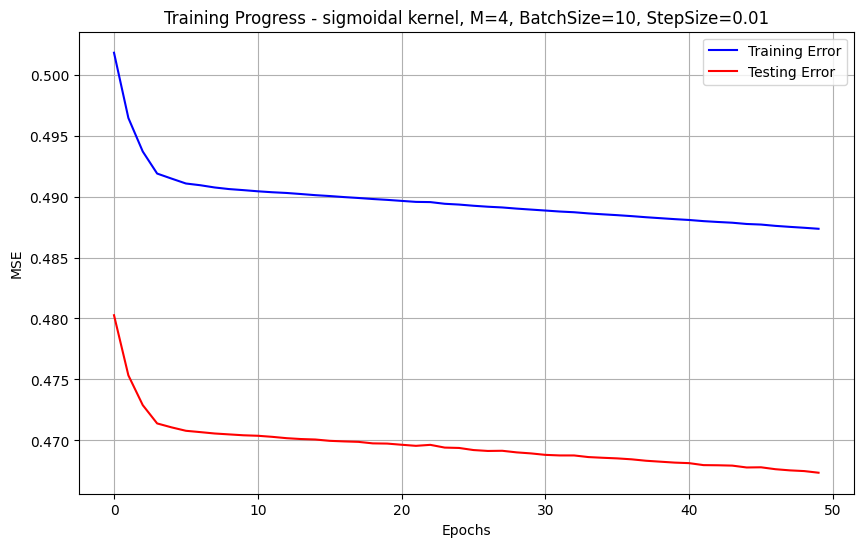

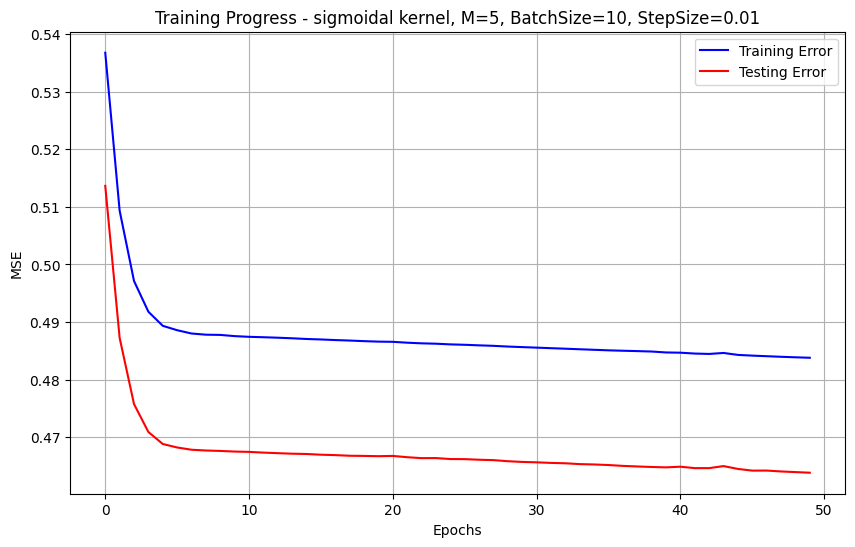

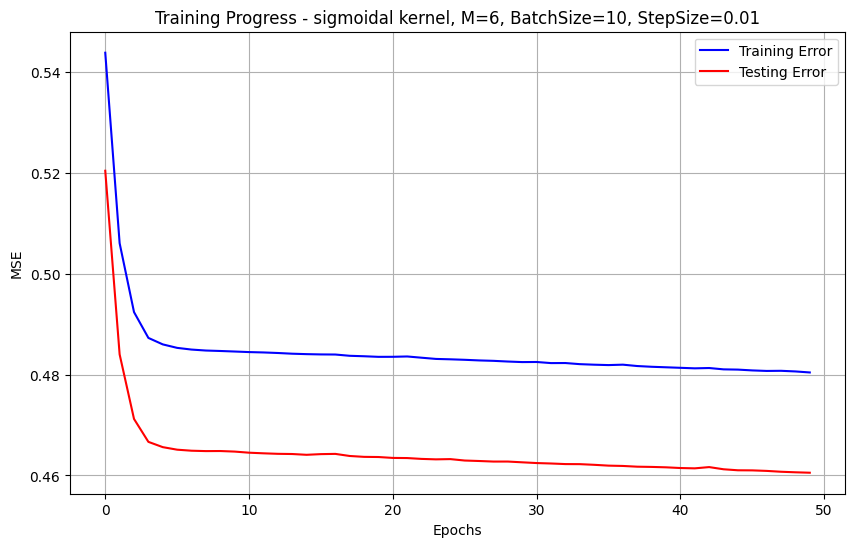

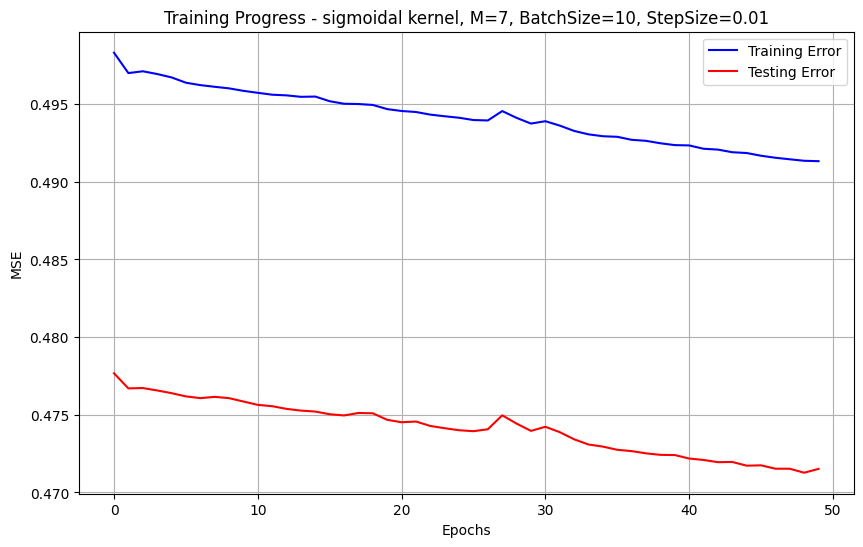

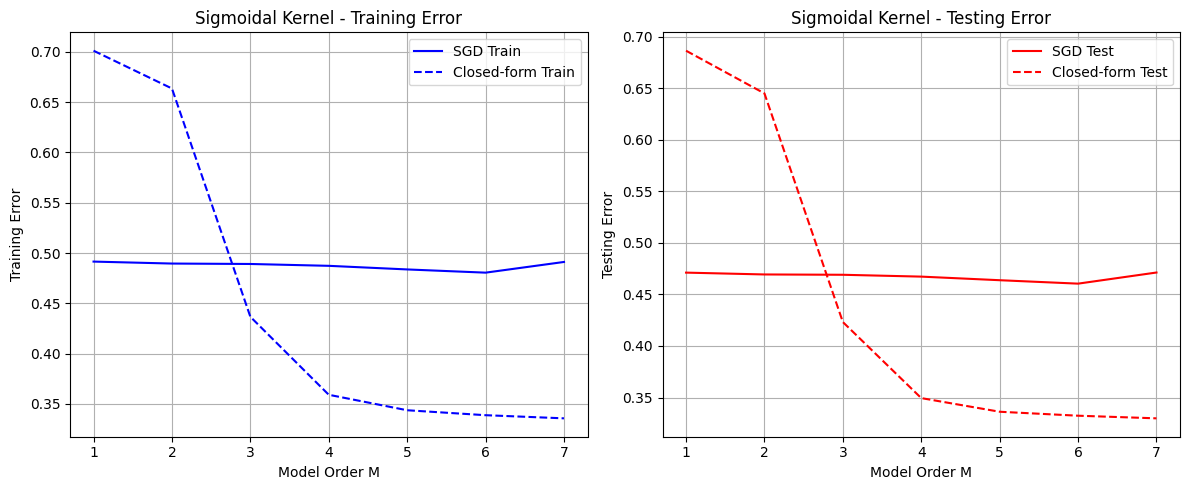

In [66]:
# Generate data (same as Part 3)
np.random.seed(42)
N = 100
x = np.linspace(0, 1, N)
t = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, N)

# Split data
X_train = x[::2]  # Even indices
Y_train = t[::2]
X_test = x[1::2]  # Odd indices
Y_test = t[1::2]

# Experiment 1: Effect of Step Size
print("=== Studying Effect of Step Size ===")
step_sizes = [0.0001, 0.0005, 0.001,0.01,0.1,0.5]
M = 5
kernelType = 'polynomial'
Epochs = 1000
BatchSize = 10

for step_size in step_sizes:
    print(f"\nStep Size: {step_size}")
    weights_sgd = Training(X_train, Y_train, X_test, Y_test, kernelType, M, Epochs, BatchSize, step_size)

    # Compare with closed-form solution from Part 3
    weights_closed = KernelRegressionFit(X_train, Y_train, kernelType, M, 0.01)

    print(f"SGD weights: {weights_sgd[:5]}...")  # Show first 5 weights
    print(f"Closed-form weights: {weights_closed[:5]}...")
    print(f"Weight difference (L2 norm): {np.linalg.norm(weights_sgd - weights_closed):.4f}")

# Experiment 2: Effect of Batch Size
print("\n=== Studying Effect of Batch Size ===")
batch_sizes = [1, 5, 10, 25]  # From SGD to full batch
step_size = 0.01
convergence_epochs = []

for batch_size in batch_sizes:
    print(f"\nBatch Size: {batch_size}")
    weights_sgd = Training(X_train, Y_train, X_test, Y_test, kernelType, M, Epochs, batch_size, step_size)
    # You can track convergence by monitoring when error stabilizes

# Experiment 3: Comprehensive Comparison
print("\n=== Comprehensive Comparison Across Kernels ===")
kernels = ['polynomial', 'gaussian', 'sigmoidal']
M_range = range(1, 8)

for kernel in kernels:
    print(f"\n--- {kernel.upper()} KERNEL ---")
    sgd_train_errors = []
    sgd_test_errors = []
    closed_train_errors = []
    closed_test_errors = []

    for M in M_range:
        # SGD approach
        weights_sgd = Training(X_train, Y_train, X_test, Y_test, kernel, M, 50, 10, 0.01)
        tr_err_sgd, te_err_sgd = ErrorPred(weights_sgd, X_train, Y_train, X_test, Y_test, kernel)

        # Closed-form approach
        weights_closed = KernelRegressionFit(X_train, Y_train, kernel, M, 0.01)
        tr_err_closed, te_err_closed, _, _ = KernelRegressionPred_Error(weights_closed, X_train, Y_train, X_test, Y_test, kernel, M)


        sgd_train_errors.append(tr_err_sgd)
        sgd_test_errors.append(te_err_sgd)
        closed_train_errors.append(tr_err_closed)
        closed_test_errors.append(te_err_closed)

    # Plot comparison
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(M_range, sgd_train_errors, 'b-', label='SGD Train')
    plt.plot(M_range, closed_train_errors, 'b--', label='Closed-form Train')
    plt.xlabel('Model Order M')
    plt.ylabel('Training Error')
    plt.title(f'{kernel.capitalize()} Kernel - Training Error')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(M_range, sgd_test_errors, 'r-', label='SGD Test')
    plt.plot(M_range, closed_test_errors, 'r--', label='Closed-form Test')
    plt.xlabel('Model Order M')
    plt.ylabel('Testing Error')
    plt.title(f'{kernel.capitalize()} Kernel - Testing Error')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


#OBSERVATIONS-

Very small step sizes like 0.0001 lead to very slow convergence, causing the training error to decrease slowly across epochs.

Moderate step sizes like 0.001 or 0.01 usually result in a faster convergence and can match the closed-form weights quite closely.

Very large step sizes like 0.5 can cause the weights to overshoot the minima, leading to instability, fluctuating errors, or divergence.

Batch size = 1 (pure SGD): Very noisy updates, which can prevent smooth convergence but may help escape local minima in complex models.

Batch size = 5 or 10: Acts as a middle ground, leading to faster and smoother convergence with good generalization.

 # Part 5: Understanding bias-variance trade-off

In [67]:
 ########################################
 #Generate 100 data sets of noisy sinusoidal data
 ########################################

L = 100  # number of datasets
N = 25   # datapoints per dataset
x_all = np.linspace(0, 1, N)
datasets = []

for _ in range(L):
    y = np.sin(2 * np.pi * x_all) + np.random.normal(0, 0.3, N)
    datasets.append((x_all, y))

In [68]:
def gaussian_basis_functions(x, centers, s=0.5):
    return np.exp(- (x[:, None] - centers[None, :])**2 / (2 * s**2))

def design_matrix(x, centers, s=0.5):
    phi = gaussian_basis_functions(x, centers, s)
    return np.hstack([np.ones((x.shape[0], 1)), phi])  # Add bias term

M = 24
centers = np.linspace(0, 1, M)


In [69]:
 ########################################
 #Use regularized least squares to estimate w
 ########################################
def fit_model_ridge(x, y, lam, centers, s=0.5):
    # Build the design matrix using Gaussian basis functions
    Phi = design_matrix(x, centers, s)

    # Add regularization term: lam * I (identity matrix)
    I = np.eye(Phi.shape[1])

    # Compute ridge regression weights
    w = np.linalg.inv(Phi.T @ Phi + lam * I) @ Phi.T @ y

    return w

In [70]:
 ########################################
 #Illustrate the concept of Bias-Variance trade off
 ########################################
lambdas = [1e-5, 1, 1000]
x_plot = np.linspace(0, 1, 100)
Phi_plot = design_matrix(x_plot, centers)
results = {}

for lam in lambdas:
    curves = []
    for x, y in datasets:
        w = fit_model_ridge(x, y, lam, centers)
        y_pred = Phi_plot @ w  # manual prediction
        curves.append(y_pred)
    results[lam] = np.array(curves)



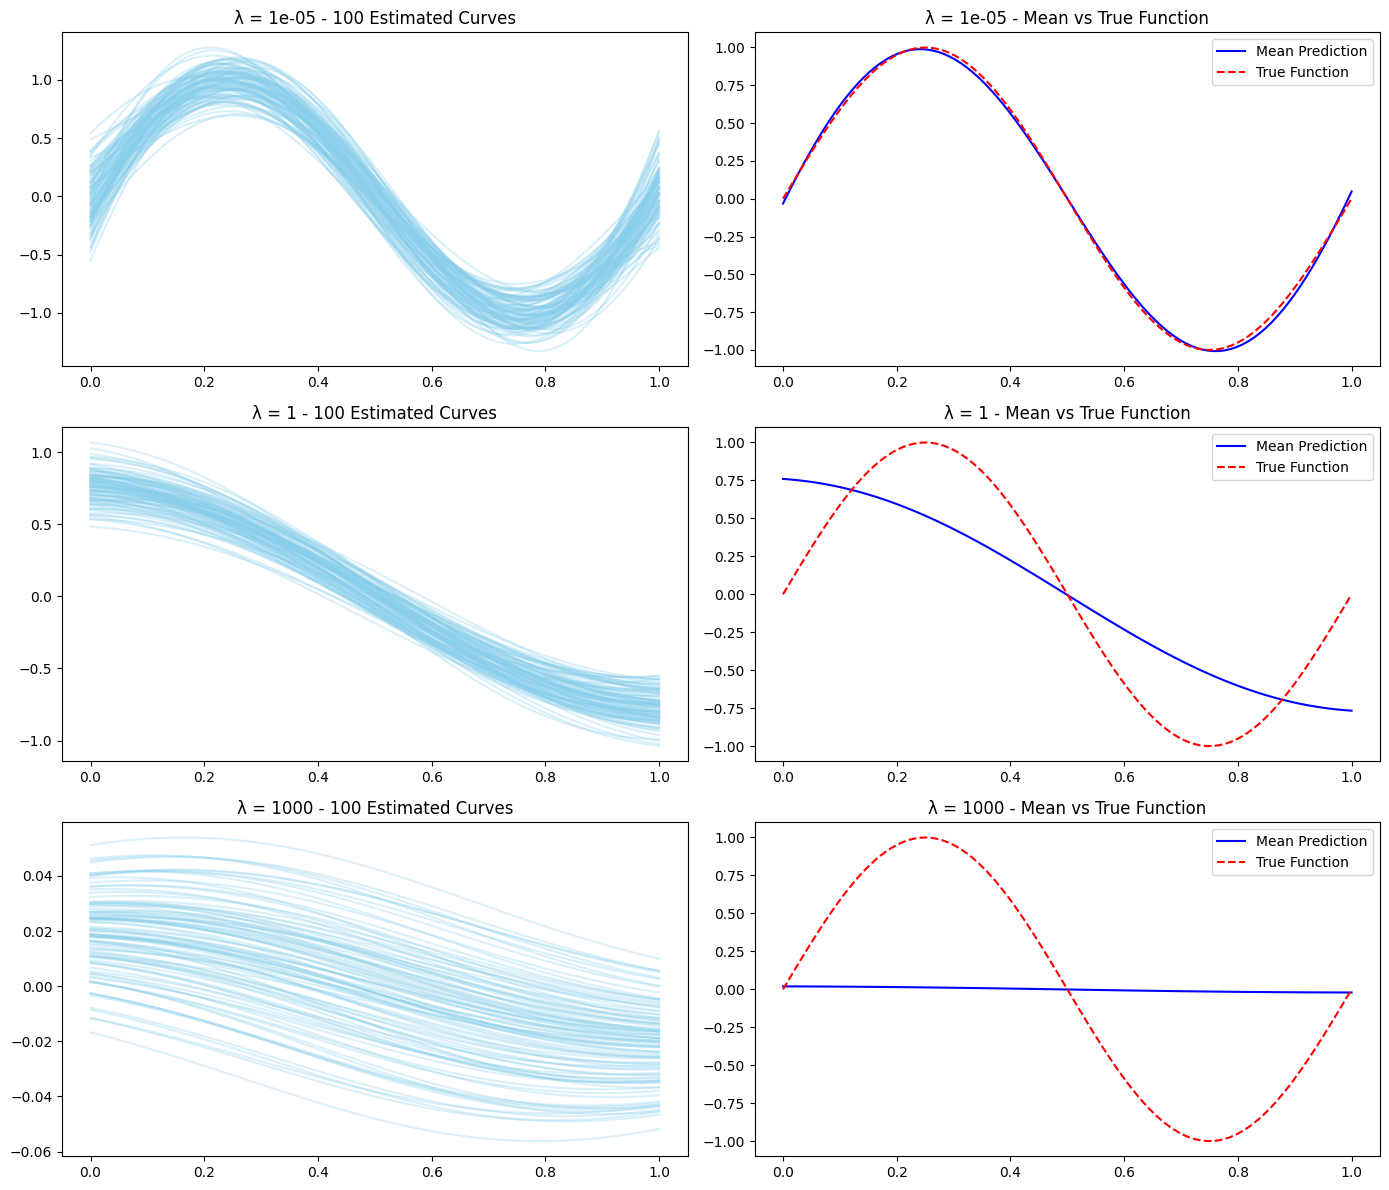

In [71]:
#plots
fig, axs = plt.subplots(len(lambdas), 2, figsize=(14, 12))

for i, lam in enumerate(lambdas):
    curves = results[lam]

    # 1st plot: all estimated curves
    for curve in curves:
        axs[i, 0].plot(x_plot, curve, color='skyblue', alpha=0.3)
    axs[i, 0].set_title(f"λ = {lam} - 100 Estimated Curves")

    # 2nd plot: mean of estimated curves and true sine
    mean_curve = np.mean(curves, axis=0)
    axs[i, 1].plot(x_plot, mean_curve, label='Mean Prediction', color='blue')
    axs[i, 1].plot(x_plot, np.sin(2 * np.pi * x_plot), label='True Function', linestyle='--', color='red')
    axs[i, 1].set_title(f"λ = {lam} - Mean vs True Function")
    axs[i, 1].legend()

plt.tight_layout()
plt.show()


#OBSERVATIONS

λ = Very Low (e.g., 1e-5)

Plot 1: 100 Estimated Curves  
- Curves vary wildly — some fit the noise perfectly.  
- High variance — the model overfits each dataset individually.

Plot 2: Mean Prediction vs. True Function  
- Mean of predictions is close to the true sine function.  
- Low bias — on average, the model captures the true function well.

Conclusion:  
Low λ leads to low bias but high variance.

---

λ = Medium (e.g., 1)

Plot 1: 100 Estimated Curves  
- Curves are smoother with less extreme variation across datasets.  
- Still flexible, but avoids wild overfitting.

Plot 2: Mean Prediction vs. True Function  
- Mean curve closely follows the sine wave with slight smoothing.  
- A balanced trade-off between bias and variance.

Conclusion:  
Medium λ leads to moderate bias and moderate variance, offering the best generalization.

---

λ = High (e.g., 1000)

Plot 1: 100 Estimated Curves  
- All predictions are nearly identical and flat.  
- Very little variation — model fails to adapt to data.

Plot 2: Mean Prediction vs. True Function  
- Mean prediction is far from the sine wave.  
- High bias — the model underfits and oversimplifies the problem.

Conclusion:  
High λ leads to high bias and low variance.


 # Part 6: Exploring Maximum a Posteriori (MAP) Estimation

In [72]:
# Generate x values
np.random.seed(42)
N = 100
x = np.sort(np.random.rand(N))
noise = np.random.normal(0, 0.1, size=N)
y = np.sin(2 * np.pi * x) + noise

In [73]:
def gaussian_basis_functions(x, centers, s=0.1):
    return np.exp(- (x[:, None] - centers[None, :])**2 / (2 * s**2))

def design_matrix(x, centers, s=0.1):
    phi = gaussian_basis_functions(x, centers, s)
    return np.hstack([np.ones((x.shape[0], 1)), phi])  # Add bias term


In [74]:
# Model parameters
M = 20  # model order
s = 0.1  # width of Gaussian
alpha = 1.0  # prior precision
beta = 1 / (0.1**2)  # likelihood precision

# Design matrix
centers = np.linspace(0, 1, M)
Phi = design_matrix(x, centers, s)

# Prior
S_N_inv = alpha * np.eye(M + 1)
m_N = np.zeros(M + 1)

# Sequential Bayesian update
for n in range(N):
    phi_n = Phi[n:n+1].T
    t_n = y[n]
    S_N_inv += beta * phi_n @ phi_n.T
    m_N += beta * t_n * phi_n[:, 0]

# Final posterior
S_N = np.linalg.inv(S_N_inv)
m_N = S_N @ m_N


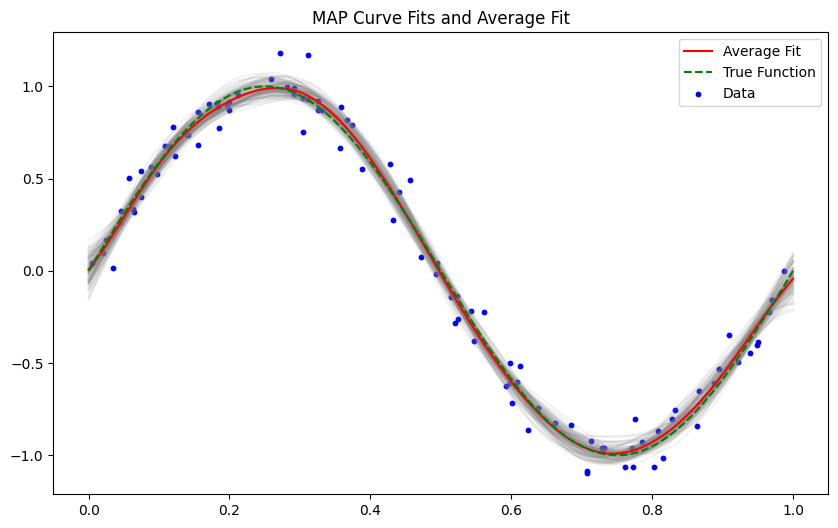

In [75]:
x_test = np.linspace(0, 1, 200)
Phi_test = design_matrix(x_test, centers, s)

# Sample 100 weights from posterior
fits = []
for _ in range(100):
    w_sample = np.random.multivariate_normal(m_N, S_N)
    y_pred = Phi_test @ w_sample
    fits.append(y_pred)

fits = np.array(fits)
avg_fit = np.mean(fits, axis=0)

# Plot
plt.figure(figsize=(10, 6))
for i in range(100):
    plt.plot(x_test, fits[i], color='gray', alpha=0.1)
plt.plot(x_test, avg_fit, 'r', label='Average Fit')
plt.plot(x_test, np.sin(2 * np.pi * x_test), 'g--', label='True Function')
plt.scatter(x, y, s=10, color='blue', label='Data')
plt.legend()
plt.title('MAP Curve Fits and Average Fit')
plt.show()


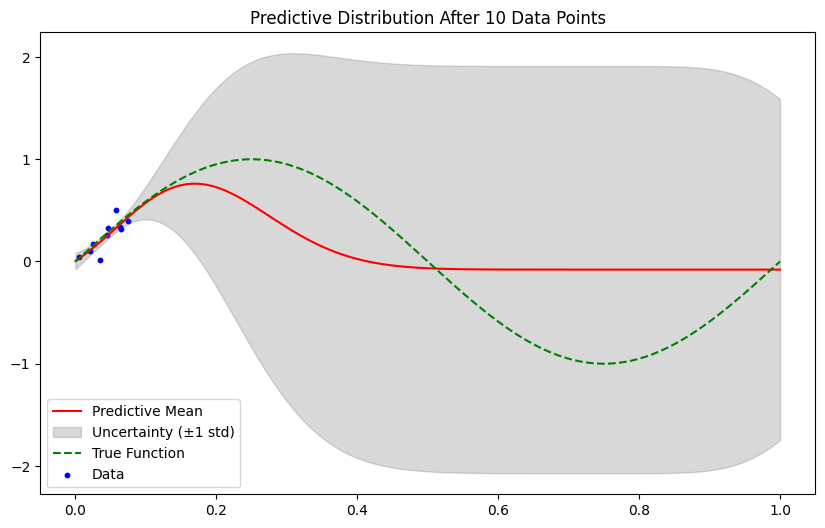

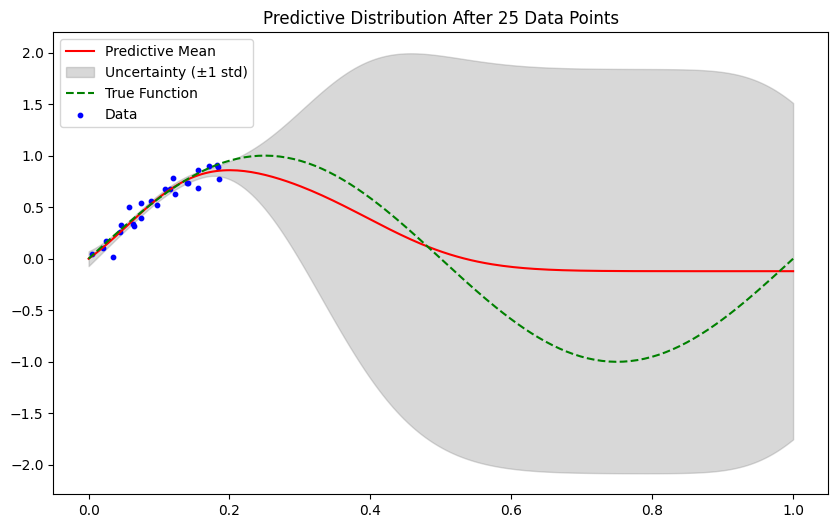

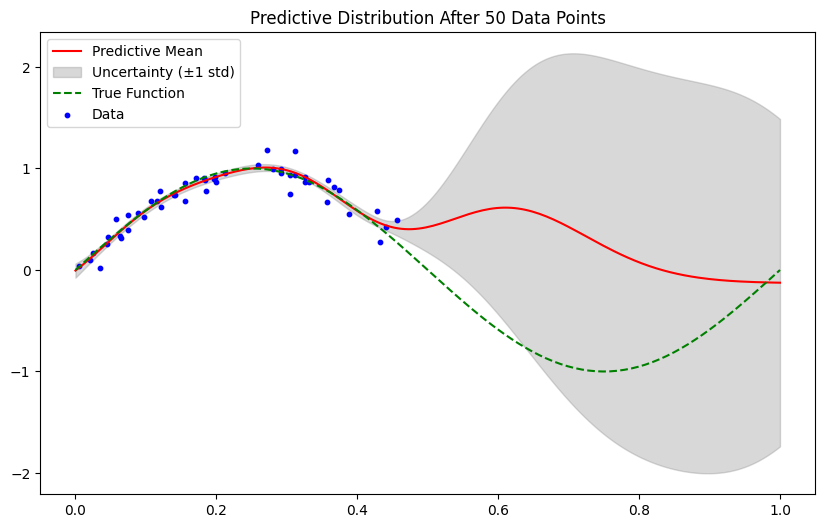

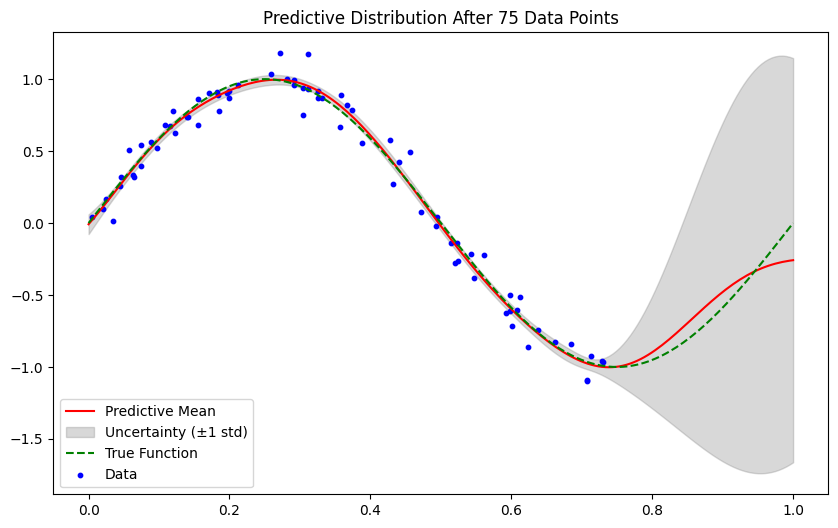

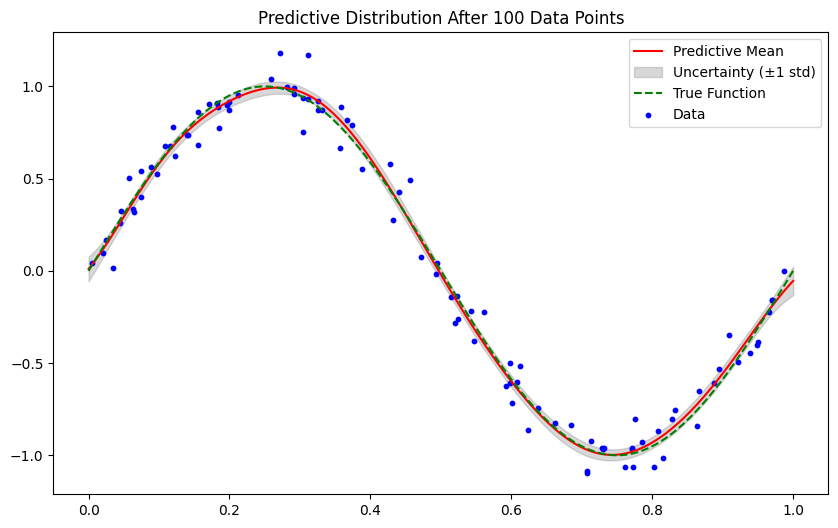

In [76]:
########################################
#Predictive distribution analysis
########################################
#Predictive distribution analysis through sampling
#Iterate through data points and sample weight vectors when partial data points are seen (10,25,50,75,100).

data_sizes = [10, 25, 50, 75, 100]
for n_points in data_sizes:
    # Subset data
    Phi_sub = Phi[:n_points]
    y_sub = y[:n_points]

    S_N_inv = alpha * np.eye(M + 1)
    m_N = np.zeros(M + 1)

    for n in range(n_points):
        phi_n = Phi_sub[n:n+1].T
        t_n = y_sub[n]
        S_N_inv += beta * phi_n @ phi_n.T
        m_N += beta * t_n * phi_n[:, 0]

    S_N = np.linalg.inv(S_N_inv)
    m_N = S_N @ m_N

    y_pred_mean = Phi_test @ m_N
    y_pred_std = np.sqrt(np.sum(Phi_test @ S_N * Phi_test, axis=1))  # Variance = φᵗSφ

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_test, y_pred_mean, 'r', label='Predictive Mean')
    plt.fill_between(x_test, y_pred_mean - y_pred_std, y_pred_mean + y_pred_std,
                     color='gray', alpha=0.3, label='Uncertainty (±1 std)')
    plt.plot(x_test, np.sin(2 * np.pi * x_test), 'g--', label='True Function')
    plt.scatter(x[:n_points], y[:n_points], color='blue', s=10, label='Data')
    plt.title(f'Predictive Distribution After {n_points} Data Points')
    plt.legend()
    plt.show()


#OBSERVATIONS
The average fit (red curve) closely follows the true underlying function.This indicates that the Bayesian model is well-regularized and able to generalize well from noisy data.

Predictive Distribution at Different Dataset Sizes-
(a) After 10 Data Points
The model has high uncertainty as only a few data points are available.

The red curve (predictive mean) deviates significantly from the true function.

The gray uncertainty band (±1 std) is wide across the domain.

The model is highly underconfident and shows significant variance.

(b) After 25 Data Points
The model starts shaping the sine-like behavior, especially in regions with observed data.

Uncertainty starts shrinking in the vicinity of the data points but remains large in unseen regions.

The posterior is updated with more information, reducing variance slightly.

(c) After 50 Data Points
The predictive mean closely matches the true function in most regions.

The uncertainty is now notably reduced where data is dense.

The model generalizes better and Bayesian regularization is evident.

 (d) After 75 Data Points
The predictive mean almost overlays the true sine curve.

Only minimal deviation is seen in high-frequency noise regions.

The uncertainty band becomes tight — model is confident in its predictions.

 (e) After 100 Data Points (Full Data)
The model performs nearly optimally.

The average prediction is highly aligned with the true function across the domain.

The uncertainty is lowest at regions with abundant data.

Very small variance remains due to the inherent noise in the data.
